In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.signal as signal
import sys

In [24]:
# Define path prefix and suffix
# path_prefix = "../real-diodes-out/"
# path_prefix = "../real-diodes-in-T00-L10-D00/"
# path_prefix = "../real-diodes-in-T00-L10-D10/"
# path_prefix = "../real-diodes-in-T10-L10-D00/"
# path_prefix = "../real-diodes-in-T10-L10-D10/"


# Define path prefixes
path_prefixes = [ 
    # "../real-diodes-out/",
    "../real-diodes-in-T00-L10-D00/",
    # "../real-diodes-in-T00-L10-D10/",
    "../real-diodes-in-T10-L10-D00/",
    # "../real-diodes-in-T10-L10-D10/",
    "../synth-diodes-1f-1r-in-T00-L10-D00/",
    # "../synth-diodes-1f-1r-in-T00-L10-D10/",
    "../synth-diodes-1f-1r-in-T10-L10-D00/",
    # "../synth-diodes-1f-1r-in-T10-L10-D10/",
    # "../synth-diodes-1f-1r-out/",
    # "../synth-diodes-2f-1r-in-T10-L10-D10/",
    # "../synth-diodes-2f-1r-out-T10-L10-D10/",
    # "../synth-diodes-4f-1r-in-T10-L10-D10/",
    # "../synth-diodes-4f-1r-out-T10-L10-D10/"
]

path_suffixes = [
    "/scope.csv",
    "/spectrum.csv"
]

# List of parameterized CSV file paths
parameters = [
    "100Hz200mV",
    "100Hz1V",
    "100Hz2V",
    "100Hz5V",
    "1kHz200mV",
    "1kHz1V",
    "1kHz2V",
    "1kHz5V",
]

/var/folders/10/yxvsq_bs3l970t62mzzkgk0c0000gp/T/ipykernel_95026/2644321084.py:94: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels()[:-1])  # Remove the last x-tick label
/var/folders/10/yxvsq_bs3l970t62mzzkgk0c0000gp/T/ipykernel_95026/2644321084.py:94: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels()[:-1])  # Remove the last x-tick label
/var/folders/10/yxvsq_bs3l970t62mzzkgk0c0000gp/T/ipykernel_95026/2644321084.py:94: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels()[:-1])  # Remove the last x-tick label
/var/folders/10/yxvsq_bs3l970t62mzzkgk0c0000gp/T/ipykernel_95026/2644321084.py:94: UserWarning: set_ticklabels() should only be

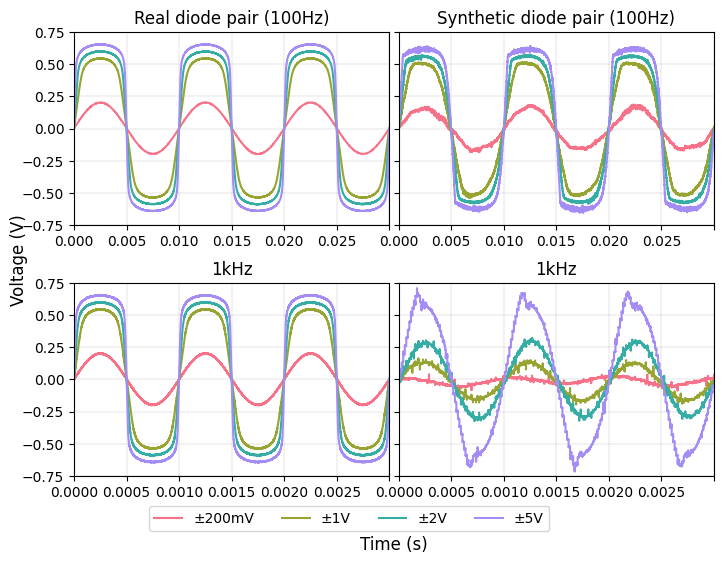

In [6]:
# Re-define and re-order path prefixes
path_prefixes = [ 
    "../real-diodes-out/",
    "../synth-diodes-1f-1r-out/",
    "../real-diodes-out/",
    "../synth-diodes-1f-1r-out/"
]

# List of parameterized CSV file paths
parameters_top = [
    "100Hz200mV",
    "100Hz1V",
    "100Hz2V",
    "100Hz5V"
]

parameters_bottom = [
    "1kHz200mV",
    "1kHz1V",
    "1kHz2V",
    "1kHz5V",
]

# Plot function
def plot_waveform_100Hz(ax, df, name, color):
    ax.plot(
        df["Time (s)"], 
        df["Channel 1 (V)"], 
        label=name[1], 
        color=color
    )
    ax.set_xlim(0.0, 0.03)
    ax.set_ylim(-0.75, 0.75)
    ax.grid(visible=True, color='k', linestyle='--', linewidth=0.1)


# Plot function

def plot_waveform_1kHz(ax, df, name, color):
    ax.plot(
        df["Time (s)"], 
        df["Channel 1 (V)"], 
        label="±"+name[1][4:], 
        color=color
    )
    ax.set_xlim(0.0, 0.003)
    ax.set_ylim(-0.75, 0.75)
    ax.grid(visible=True, color='k', linestyle='--', linewidth=0.1)


def plot():
    fig, axes = plt.subplots(
                        2, 2, 
                        figsize=(8, 6), 
                        # sharex='all',
                        constrained_layout=False
                        )
    
    axes = axes.flatten()
    colors = sns.color_palette("husl", len(parameters_top))

    # Top-left and top-right for real and virtual diodes
    for i, path_prefix in enumerate(path_prefixes[:2]):
        for j, param in enumerate(parameters_top):
            file = path_prefix + param + path_suffixes[0]
            df = pd.read_csv(file, comment='#')
            df_filtered = df[(df["Time (s)"] >= 0) & (df["Time (s)"] <= 0.03)]
            plot_waveform_100Hz(
                    axes[i], 
                    df_filtered, 
                    (path_prefix, param), 
                    colors[j]
                    )

    # Bottom-left and bottom-right for real and virtual diodes
    for i, path_prefix in enumerate(path_prefixes[2:]):
        for j, param in enumerate(parameters_bottom):
            file = path_prefix + param + path_suffixes[0]
            df = pd.read_csv(file, comment='#')
            df_filtered = df[(df["Time (s)"] >= 0) & (df["Time (s)"] <= 0.003)]
            plot_waveform_1kHz(
                    axes[i + 2], 
                    df_filtered, 
                    (path_prefix, param), 
                    colors[j]
                    )

    # Remove y-axis labels & ticks for right column subplots
    for ax in [axes[1], axes[3]]:
        ax.set_ylabel("")
        ax.set_yticklabels([])

    for ax in [axes[0], axes[1], axes[2],axes[3]]:      
        ax.set_xticklabels(ax.get_xticklabels()[:-1])  # Remove the last x-tick label

    # for ax in [axes[0], axes[1], axes[2], axes[3]]:  
    #     ax.set_xticks(ax.get_xticks())  # Ensure ticks are explicitly set
    #     ax.set_xticklabels(ax.get_xticklabels()[:-1])  # Remove the last x-tick label



    axes[3].legend(
        bbox_to_anchor=(0.5, -0.12),
        fancybox=True, 
        shadow=False, 
        ncol=5)
    

    # Set titles for the top subplots
    axes[0].set_title("Real diode pair (100Hz)")  
    axes[1].set_title("Synthetic diode pair (100Hz)")

    # Set titles for the bottom subplots
    axes[2].set_title("1kHz")  
    axes[3].set_title("1kHz")

    fig.supxlabel("Time (s)")  # Common x-axis label
    fig.supylabel("Voltage (V)")  # Common y-axis label

    plt.subplots_adjust(wspace=0.03, hspace=0.3, left=0.1, bottom=0.14)  # Reduce subplot spacing

    plt.savefig("real-vs-synth-isolation-clipped-waveform-1Hz-1kHz.png")
    plt.show()

plot()


/var/folders/10/yxvsq_bs3l970t62mzzkgk0c0000gp/T/ipykernel_95026/1166493402.py:77: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[2].set_xticklabels(axes[2].get_xticklabels()[:-1])  # Remove the last x-tick label


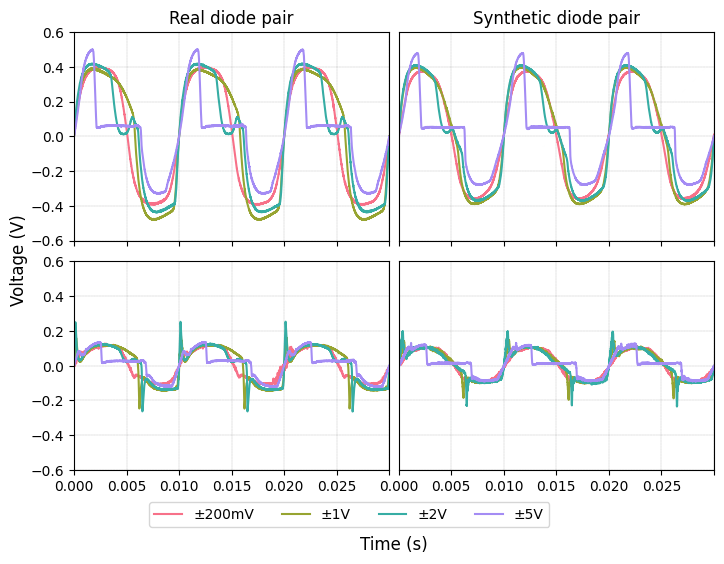

In [7]:
# Re-define and re-order path prefixes
path_prefixes = [ 
    "../real-diodes-in-T00-L10-D00/",
    "../synth-diodes-1f-1r-in-T00-L10-D00/",
    "../real-diodes-in-T10-L10-D00/",
    "../synth-diodes-1f-1r-in-T10-L10-D00/",
]

# List of parameterized CSV file paths
parameters = [
    "100Hz200mV",
    "100Hz1V",
    "100Hz2V",
    "100Hz5V"
]


# Plot function
def plot_waveform(ax, df, name, color, plot_legend=False):
    ax.plot(
        df["Time (s)"], 
        df["Channel 1 (V)"], 
        label="±"+name[1][5:],  
        color=color
    )
    # ax.set_xlabel("Time (s)")
    # ax.set_ylabel("Voltage (V)")
    # ax.set_title(name[0])
    ax.grid(visible=True, color='k', linestyle='--', linewidth=0.1)
    ax.set_xlim(0.0, 0.03)
    ax.set_ylim(-0.6, 0.6)
    if plot_legend:
        ax.legend()

def plot():
    fig, axes = plt.subplots(
                        2, 2, 
                        figsize=(8, 6), 
                        sharex='all',
                        # sharey=True, 
                        constrained_layout=False
                        # constrained_layout=True
                        )
      
    axes = axes.flatten()
    colors = sns.color_palette("husl", len(parameters))

    for i, path_prefix in enumerate(path_prefixes):
        for j, param in enumerate(parameters):
            file = path_prefix + param + path_suffixes[0]
            df = pd.read_csv(file, comment='#')
            df_filtered = df[(df["Time (s)"] >= 0) & (df["Time (s)"] <= 0.03)]
            plot_waveform(
                    axes[i], 
                    df_filtered, 
                    (path_prefix, param), 
                    colors[j]
                    )

    axes[3].legend(
        # loc='upper right', 
        bbox_to_anchor=(0.5, -0.12),
        fancybox=True, 
        shadow=False, 
        ncol=5)


    # Remove y-axis labels & ticks for right column subplots
    for ax in [axes[1], axes[3]]:
        ax.set_ylabel("")
        ax.set_yticklabels([])
        ax.tick_params(left=False)  # Remove left ticks

    

    # Remove the last tick label on the bottom left subplot (axes[2])
    axes[2].set_xticklabels(axes[2].get_xticklabels()[:-1])  # Remove the last x-tick label
    # axes[0].set_yticklabels(axes[0].get_yticklabels()[1:]) 


    # Set titles for the top subplots
    axes[0].set_title("Real diode pair")  # Customize with your title
    axes[1].set_title("Synthetic diode pair")  # Customize with your title

    fig.supxlabel("Time (s)")  # Common x-axis label
    fig.supylabel("Voltage (V)")  # Common y-axis label

    plt.subplots_adjust(wspace=0.03, hspace=0.1, left=0.1, bottom=0.15)  # Reduce subplot spacing

    plt.savefig("real-vs-synth-in-circuit-clipped-waveform-1Hz.png")

    plt.show()

plot()



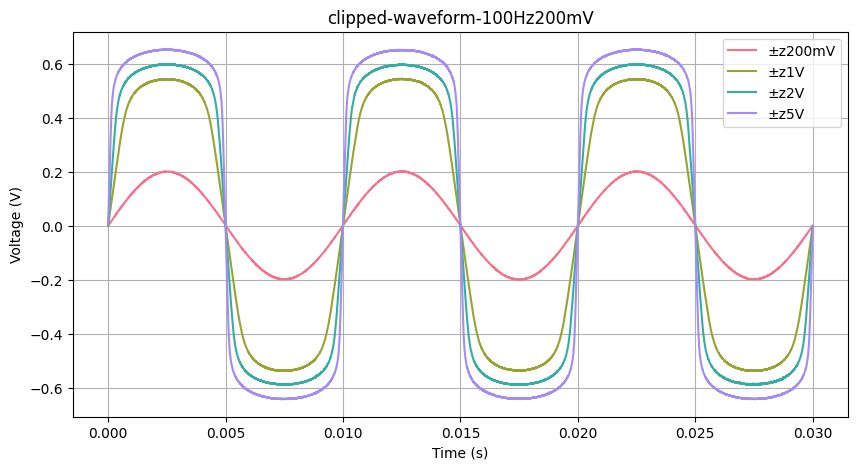

In [400]:
# csv_files = [ path_prefixes + param + path_suffixes for param in parameters]
csv_files = [ ( path_prefixes[0], param, path_suffixes[0])  for param in parameters]

# Plot Oscilloscope Waveform
def plot_waveform(plt, df, name):

    plt.figure(figsize=(10, 5))
    plt.plot(df["Time (s)"], df["Channel 1 (V)"], label=name, color='b')
    plt.xlabel("Time (s)")
    plt.ylabel("Voltage (V)")
    plt.title("Scope " + name)
    plt.grid()
    plt.legend()
    plt.show()

def plot_welch_psd(df, name, fs=1600):
    signal_data = df["Channel 1 (V)"].to_numpy()
    f_w, P_w = signal.welch(signal_data, fs=fs, scaling='density', window='hann')
    
    plt.figure(figsize=(10, 5))
    plt.semilogy(f_w, P_w, label=f"Welch's PSD: {name}")
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Power Spectral Density (V²/Hz)")
    plt.title(f"Welch's Method - Power Spectral Density: {name}")
    plt.grid()
    plt.legend()
    plt.show()


def plotAll( plt, files ):# Process and plot each file  
    
    colors = sns.color_palette("husl", len(files))  # Generates distinct colors
    for i, file in enumerate(files):  # Get index (i) and file
        path_prefixes, param, path_suffixes = file
        file = path_prefixes + param + path_suffixes
        df = pd.read_csv(file, comment='#')
        df_filtered = df[(df["Time (s)"] >= 0) & (df["Time (s)"] <= 0.03)]
        # plt.plot(
        #     df["Time (s)"], 
        #     df["Channel 1 (V)"],  
        #     label=file.split("/")[2], 
        #     color=colors[i] # Use index 'i' to vary color
        # )
        plt.plot(
            df_filtered["Time (s)"],
            df_filtered["Channel 1 (V)"], 
            label="±"+file.split("/")[2][4:], 
            # label=file.split("/")[2][5:], 
            color=colors[i] # Use index 'i' to vary color
        )
        # print(df_filtered)
    

def plot():

    label = "clipped-waveform-" + csv_files[0][1]
    plt.figure(figsize=(10, 5))
    plotAll(plt, csv_files)
    plt.xlabel("Time (s)")
    plt.ylabel("Voltage (V)")
    plt.title(label)
    plt.grid()
    plt.legend()
    plt.savefig(label + ".png")
    # plt.savefig("Clipped-Waveform-100Hz.png")
    plt.show()

plot()


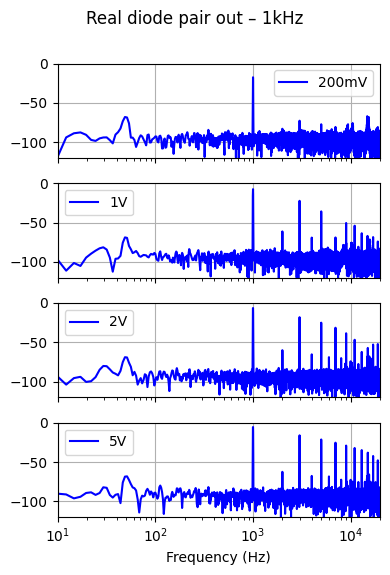

In [341]:

path_prefixes = [ 
    "../real-diodes-out/"
]


path_suffixes = [
    # "/scope.csv",
    "/spectrum.csv"
]


csv_files = [path_prefixes[0] + param + path_suffixes[0] for param in parameters]

# Compute Global Axis Limits
all_data = [ pd.read_csv(file, comment='#') for file in csv_files]

# global_xmax = max(df["Frequency (Hz)"].max() for df in all_data)
# global_xmin = min(df["Frequency (Hz)"].min() for df in all_data)
global_xmax = 20000
global_xmin = 10
global_ymax_mag = 0
global_ymin_mag = -120
# global_ymin_mag = min(df["Trace 1 (dBV)"].min() for df in all_data)
# global_ymin_phase = min(df["Phase (deg)"].min() for df in all_data)
# global_ymax_phase = max(df["Phase (deg)"].max() for df in all_data)

# Plot Magnitude Spectrum
def plot_spectrum(df, file_name):
    plt.figure(figsize=(10, 3))
    plt.plot(df["Frequency (Hz)"], df["Trace 1 (dBV)"], color='b')
    # plt.plot(df["Frequency (Hz)"], df["Trace 1 (dBV)"], label="Magnitude (dBV)", color='b')
    plt.xscale("log")
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Magnitude (dBV)")
    plt.title("Spectrum Analyzer Output " + file_name)
    plt.xlim(global_xmin, global_xmax)  # Apply global x-axis limits
    plt.ylim(global_ymin_mag, global_ymax_mag)  # Apply global y-axis limits for magnitude
    plt.grid()
    plt.legend()
    plt.savefig( "spectrum-" + file_name + ".png")
    plt.show()

# Plot Phase Response
def plot_phase(df, file_name):
    plt.figure(figsize=(10, 5))
    plt.plot(df["Frequency (Hz)"], df["Phase (deg)"], label="Phase (deg)", color='r')
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Phase (degrees)")
    plt.title("Phase Response" + file_name)
    plt.grid()
    plt.legend()
    plt.show()

def plot_all( files ):# Process and plot each file  

    # colors = sns.color_palette("husl", len(files))  # Generates distinct colors
    fig, ax1 = plt.subplots(len(files), 1, figsize=(4, 6), sharex=True)
    for i, file in enumerate(files):  # Get index (i) and file
        df = pd.read_csv(file, comment='#')
       
        # fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
        # fig.suptitle('Spectrum – Phase plots')
        
        ax1[i].plot(
            df["Frequency (Hz)"], 
            df["Trace 1 (dBV)"], 
            label=file.split("/")[2][4:], 
            color='b'
            #  color=colors[i] # Use index 'i' to vary color
            )
        # ax1[i].set_xlabel("Frequency (Hz)")
        # ax1[i].set_ylabel("Magnitude (dBV)")
        ax1[i].legend()
        ax1[i].set_xscale("log")
        ax1[i].set_xlim(global_xmin, global_xmax)  # Apply global x-axis limits
        ax1[i].set_ylim(global_ymin_mag, global_ymax_mag)  # Apply global y-axis limits for magnitude
        ax1[i].grid()

        # Remove x-labels except for the last plot
        if i < len(files) - 1:
            ax1[i].set_xticklabels([])
        else:
            ax1[i].set_xlabel("Frequency (Hz)")


        # fig.suptitle("Spectrum Analyzer " + file.split("/")[1], )
        fig.suptitle("Real diode pair out – 1kHz" )
        plt.subplots_adjust(hspace=0.5)  # Reduce vertical spacing
        plt.tight_layout(rect=[0, 0.03, 1, 0.98])  # Optimize layout while preserving title
        # plt.savefig( "spectrum-" + file + ".png")
        plt.savefig("./img/spectrum.png")


plot_all( csv_files)

def plot_spectra(files):
    for i, file in enumerate(files):  # Get index (i) and file
        df = pd.read_csv(file, comment='#')
        plot_spectrum(df, file.split("/")[2])


# plot_spectra(csv_files)

Axes(0.125,0.712609;0.352273x0.167391)


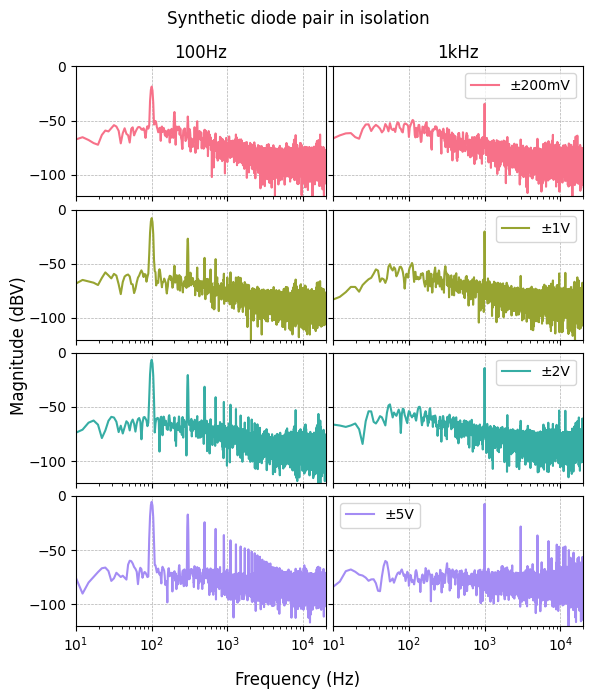

In [8]:
# Re-define file paths
# path_prefixes = ["../real-diodes-out/"]
path_prefixes = ["../synth-diodes-1f-1r-out/"]
path_suffixes = ["/spectrum.csv"]

parameters_100Hz = ["100Hz200mV", "100Hz1V", "100Hz2V", "100Hz5V"]
parameters_1kHz = ["1kHz200mV", "1kHz1V", "1kHz2V", "1kHz5V"]

csv_files_100Hz = [path_prefixes[0] + param + path_suffixes[0] for param in parameters_100Hz]
csv_files_1kHz = [path_prefixes[0] + param + path_suffixes[0] for param in parameters_1kHz]

# Define global axis limits
global_xmin, global_xmax = 10, 20000
global_ymin_mag, global_ymax_mag = -120, 0

def plot_all():
    fig, axes = plt.subplots(
                    4, 2, 
                    figsize=(6, 7), 
                    sharex=True, 
                    sharey=True)

    # Colors for better differentiation
    colors = sns.color_palette("husl", len(parameters_100Hz))

    # Plot 100Hz (left column)
    for i, file in enumerate(csv_files_100Hz):
        df = pd.read_csv(file, comment='#')
        ax = axes[i, 0]  # Left column (100Hz)
        ax.plot(
            df["Frequency (Hz)"],
            df["Trace 1 (dBV)"], 
            color=colors[i], 
            # label=parameters_100Hz[i][5:]
        )
        ax.set_xscale("log")
        ax.set_xlim(global_xmin, global_xmax)
        ax.set_ylim(global_ymin_mag, global_ymax_mag)
        # ax.set_title(f"100Hz {parameters_100Hz[i][5:]}")
        ax.grid(True, linestyle="--", linewidth=0.5)
        # ax.legend(fontsize=8)

    # Plot 1kHz (right column)
    for i, file in enumerate(csv_files_1kHz):
        df = pd.read_csv(file, comment='#')
        ax = axes[i, 1]  # Right column (1kHz)
        ax.plot(
            df["Frequency (Hz)"], 
            df["Trace 1 (dBV)"], color=colors[i], 
            label="±"+parameters_1kHz[i][4:]
        )
        ax.set_xscale("log")
        ax.set_xlim(global_xmin, global_xmax)
        ax.set_ylim(global_ymin_mag, global_ymax_mag)
        # ax.set_title(f"1kHz {parameters_1kHz[i][4:]}")
        ax.grid(True, linestyle="--", linewidth=0.5)
        ax.legend(fontsize=10)

    # # Set titles for the top subplots
    axes[0][0].set_title("100Hz")  # Customize with your title
    axes[0][1].set_title("1kHz")  # Customize with your title

    print(axes[0][0])



    # Global labels
    fig.supxlabel("Frequency (Hz)")
    fig.supylabel("Magnitude (dBV)")
    plt.suptitle("Synthetic diode pair in isolation")
    plt.tight_layout()
    plt.subplots_adjust(wspace=0.03, hspace=0.1, left=0.13, bottom=0.1)  # Reduce subplot spacing
    plt.savefig("./spectrum-synth-out-1Hz-1kHz.png")
    plt.show()

plot_all()


Average Noise Floor (RMS): 0.097399
Average Noise Floor (PSD): 0.000018


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 1024 is greater than input length  = 1000, using nperseg = 1000
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,


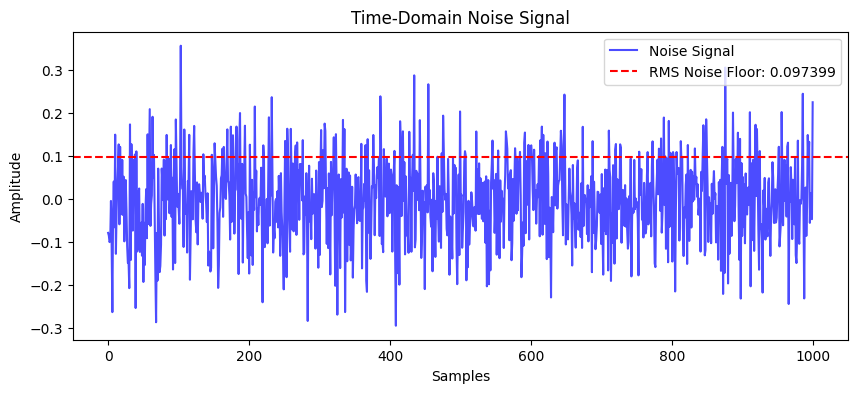

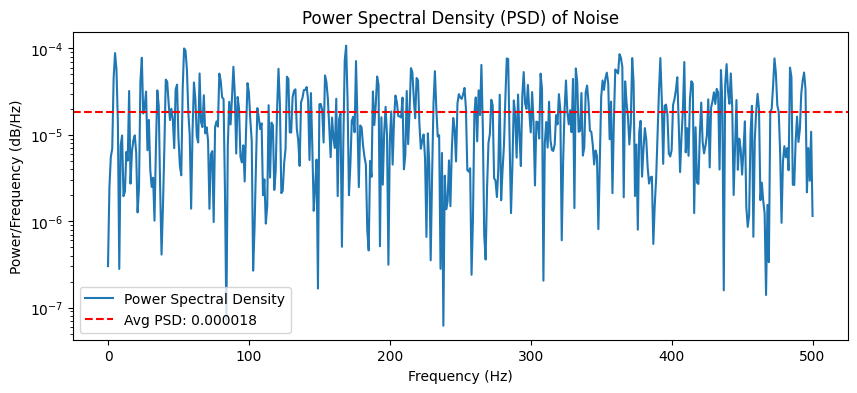

In [11]:
def compute_noise_floor(signal_data, fs, method="rms", segment=None):
    """
    Computes the average noise floor of a signal.
    
    Parameters:
    - signal_data: numpy array, the signal samples
    - fs: int, sampling frequency in Hz
    - method: str, "rms" for time-domain RMS or "psd" for frequency-domain PSD
    - segment: tuple, (start, end) indices to specify a noise-only portion
    
    Returns:
    - Average noise floor value
    """
    if segment:
        noise_data = signal_data[segment[0]:segment[1]]
    else:
        noise_data = signal_data  # Assume full signal is noise if no segment specified
    
    if method == "rms":
        noise_floor = np.sqrt(np.mean(noise_data**2))
    elif method == "psd":
        f, Pxx = signal.welch(noise_data, fs, nperseg=1024)
        noise_floor = np.mean(Pxx)
    else:
        raise ValueError("Invalid method. Choose 'rms' or 'psd'.")
    
    return noise_floor

def plot_noise(signal_data, fs, method="rms", segment=None):
    """
    Plots the noise signal either in time or frequency domain.
    """
    if segment:
        noise_data = signal_data[segment[0]:segment[1]]
    else:
        noise_data = signal_data
    
    if method == "rms":
        noise_floor = np.sqrt(np.mean(noise_data**2))
        plt.figure(figsize=(10, 4))
        plt.plot(noise_data, label='Noise Signal', color='blue', alpha=0.7)
        plt.axhline(noise_floor, color='red', linestyle='--', label=f'RMS Noise Floor: {noise_floor:.6f}')
        plt.title("Time-Domain Noise Signal")
        plt.xlabel("Samples")
        plt.ylabel("Amplitude")
        plt.legend()
        plt.show()
    
    elif method == "psd":
        f, Pxx = signal.welch(noise_data, fs, nperseg=1024)
        noise_floor = np.mean(Pxx)
        plt.figure(figsize=(10, 4))
        plt.semilogy(f, Pxx, label='Power Spectral Density')
        plt.axhline(noise_floor, color='red', linestyle='--', label=f'Avg PSD: {noise_floor:.6f}')
        plt.title("Power Spectral Density (PSD) of Noise")
        plt.xlabel("Frequency (Hz)")
        plt.ylabel("Power/Frequency (dB/Hz)")
        plt.legend()
        plt.show()

def main():
    fs = 1000  # Sampling frequency in Hz
    t = np.linspace(0, 1, fs, endpoint=False)  # 1-second signal
    noise = np.random.normal(0, 0.1, size=t.shape)  # Gaussian noise
    
    rms_noise_floor = compute_noise_floor(noise, fs, method="rms")
    psd_noise_floor = compute_noise_floor(noise, fs, method="psd")
    
    print(f"Average Noise Floor (RMS): {rms_noise_floor:.6f}")
    print(f"Average Noise Floor (PSD): {psd_noise_floor:.6f}")
    
    plot_noise(noise, fs, method="rms")
    plot_noise(noise, fs, method="psd")


main()


/var/folders/10/yxvsq_bs3l970t62mzzkgk0c0000gp/T/ipykernel_95026/345331744.py:102: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


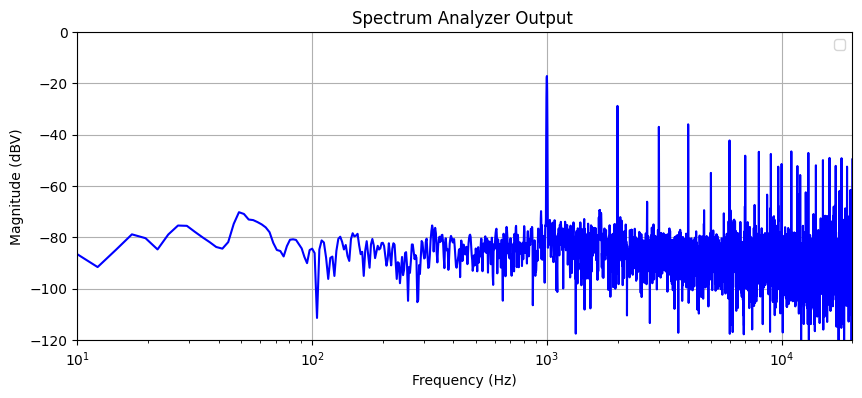

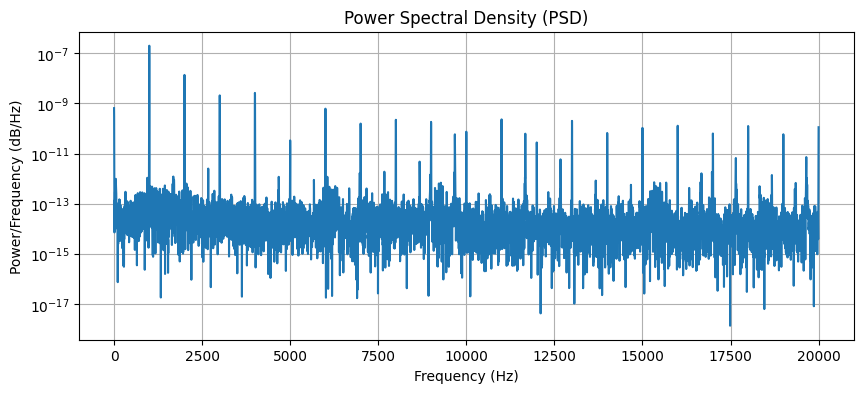

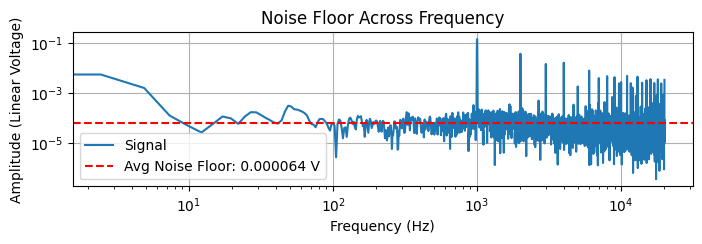

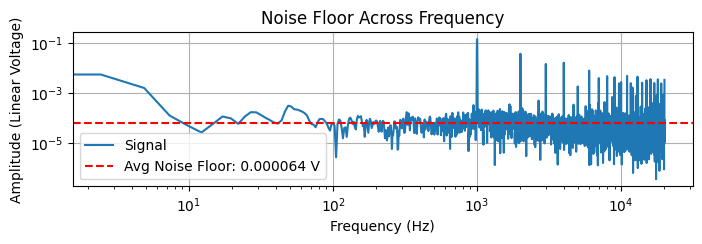

In [153]:
from scipy.signal import welch


# Define path prefixes
path_prefixes = [ 
    "../synth-diodes-1f-1r-in-T10-L10-D10/",
    # "../synth-diodes-1f-1r-in-T00-L10-D10/",
    # "../synth-diodes-1f-1r-in-T10-L10-D00/",
    # "../synth-diodes-1f-1r-in-T10-L10-D10/",
]

# Define file suffixes
path_suffixes = [
    # "/scope.csv",
    "/spectrum.csv"
]

# List of parameterized CSV file paths
parameters = [
    "1kHz200mV",
    # "1kHz1V",
    # "1kHz2V",
    # "1kHz5V",
]

csv_files = [ path_prefixes[0] + param + path_suffixes[0] for param in parameters]


def load_spectral_data(file_path):
    """
    Loads spectral data from a CSV file with the given structure:
    - Frequency (Hz), Trace 1 (dBV), Phase (deg)
    """
    return pd.read_csv(file_path, comment='#')  # Ignore comment lines

def convert_dBV_to_linear(dBV):
    """
    Converts dBV to linear scale.
    """
    return 10 ** (dBV / 20)


def compute_psd_with_welch(df, fs, nperseg=1024):
    """
    Computes the Power Spectral Density (PSD) from dBV data.
    - df: DataFrame containing Frequency, dBV data.
    - fs: Sampling frequency in Hz.
    
    Returns:
    - freqs: Frequency values (Hz)
    - psd: Power Spectral Density values
    """
    # Convert Trace 1 from dBV to linear voltage
    linear_voltage = convert_dBV_to_linear(df['Trace 1 (dBV)'].values)
    
    # Compute Power Spectral Density using Welch's method
    freqs, psd = welch(linear_voltage, fs=fs, nperseg=1024)

    # psd = 10 * np.log10(psd)

    return freqs, psd


def compute_psd_from_dBV(df, fs, convert_to_db=False):
    """
    Computes the Power Spectral Density (PSD) from dBV data.
    - df: DataFrame containing Frequency, dBV data.
    - fs: Sampling frequency in Hz.
    
    Returns:
    - freqs: Frequency values (Hz)
    - psd: Power Spectral Density values
    """
    # Convert Trace 1 from dBV to linear voltage
    linear_voltage = convert_dBV_to_linear(df['Trace 1 (dBV)'].values)
    

    # Compute power (square of linear voltage)
    power = linear_voltage ** 2
    
    # Normalize by sampling frequency and bandwidth (the bin width)
    bin_width = df['Frequency (Hz)'].iloc[1] - df['Frequency (Hz)'].iloc[0]  # Frequency bin width
    psd = power / (fs * bin_width)
    
    # Convert to dB/Hz if requested
    if convert_to_db:
        psd = 10 * np.log10(psd)

    return df['Frequency (Hz)'], psd

def plot_spectrum(df):
    plt.figure(figsize=(10, 4))
    plt.plot(df["Frequency (Hz)"], df["Trace 1 (dBV)"], color='b')
    # plt.plot(df["Frequency (Hz)"], df["Trace 1 (dBV)"], label="Magnitude (dBV)", color='b')
    plt.xscale("log")
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Magnitude (dBV)")
    plt.title("Spectrum Analyzer Output ")
    plt.xlim(global_xmin, global_xmax)  # Apply global x-axis limits
    plt.ylim(global_ymin_mag, global_ymax_mag)  # Apply global y-axis limits for magnitude
    plt.grid()
    plt.legend()
    plt.savefig( "spectrum-" )
    plt.show()

def plot_psd(freqs, psd):
    """
    Plots the Power Spectral Density (PSD).
    """
    plt.figure(figsize=(10, 4))
    plt.semilogy(freqs, psd)
    plt.title("Power Spectral Density (PSD)")
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Power/Frequency (dB/Hz)")
    plt.grid(True)
    plt.show()


def compute_average_noise_floor(df, freq_min=0, freq_max=20000):
    """
    Computes the average noise floor (in linear scale) from spectral data.
    You can specify a frequency range to calculate the noise floor within that range.
    """
    # Convert Trace 1 from dBV to linear
    linear_voltage = convert_dBV_to_linear(df['Trace 1 (dBV)'].values)
    
    # Filter the frequency range based on the specified minimum and maximum frequencies
    freqs = df['Frequency (Hz)'].values
    mask = (freqs >= freq_min) & (freqs <= freq_max)
    
    # Extract the relevant portion of the data based on the frequency mask
    selected_freqs = freqs[mask]
    selected_linear_voltage = linear_voltage[mask]
    
    # Compute the average noise floor (RMS of the selected linear voltage)
    avg_noise_floor = np.sqrt(np.mean(selected_linear_voltage**2))

    return freqs, linear_voltage, selected_freqs, selected_linear_voltage, avg_noise_floor 

def compute_average_noise_floor_from_ranges(df, freq_ranges):
    """
    Computes the average noise floor (in linear scale) for each frequency range in freq_ranges.
    Each range is a tuple (freq_min, freq_max).
    """
    # Convert Trace 1 from dBV to linear
    linear_voltage = convert_dBV_to_linear(df['Trace 1 (dBV)'].values)
    
    # Frequency data
    freqs = df['Frequency (Hz)'].values
    
    # List to store results
    avg_noise_floors = []
    ranges = []
    selected_linear_voltages = np.array([]) 
    np.set_printoptions(threshold = np.inf)
    # For each frequency range in the list, compute the average noise floor
    for (freq_min, freq_max) in freq_ranges:
        # Create mask to select frequencies in the range [freq_min, freq_max]
        mask = (freqs >= freq_min) & (freqs <= freq_max)
        
        # Extract relevant frequency and voltage data
        selected_freqs = freqs[mask]
        selected_linear_voltage = linear_voltage[mask]
        print(selected_linear_voltage.shape)
        selected_linear_voltages = np.concatenate( 
                                    (
                                        selected_linear_voltages, 
                                        selected_linear_voltage
                                    ),
                                    axis=0)
        
        
        # print(selected_linear_voltages)

    # print(selected_linear_voltages)
    # Compute the average noise floor (RMS of the selected linear voltage)
    avg_noise_floor = np.sqrt(np.mean(selected_linear_voltages**2))
        
        # # Store the result
        # avg_noise_floors.append(avg_noise_floor)
        # ranges.append((freq_min, freq_max))
    
    return freqs, linear_voltage, selected_freqs, selected_linear_voltage, avg_noise_floor 


def plot_noise_floor(freqs, linear_voltage, avg_noise_floor):
    """
    Plots the noise floor with the frequency vs. linear voltage.
    """
    # print(freqs)
    plt.figure(figsize=(8, 2))
    plt.plot(freqs, linear_voltage, label="Signal")
    plt.axhline(avg_noise_floor, color='red', linestyle='--', label=f'Avg Noise Floor: {avg_noise_floor:.6f} V')
    plt.title("Noise Floor Across Frequency")
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Amplitude (Linear Voltage)")
    plt.xscale("log")
    plt.yscale("log")
    plt.legend()
    plt.grid(True)
    plt.show()



# Example usage:
def main(file_path, fs):
    # Load the spectral data from the file
    df = load_spectral_data(file_path)
    
    plot_spectrum(df)
    # Compute the PSD from the dBV data
    freqs, psd = compute_psd_from_dBV(df, fs, convert_to_db=False)
    plot_psd(freqs, psd)

    # NOT WORKING! FOLLOW UP WITH NEW DATA IN THE TIME DOMAIN
    # freqs, psd = compute_psd_with_welch(df, fs, 1024)
    # plot_psd(freqs, psd)


    freqs, linear_voltage, _, _, avg_noise_floor = compute_average_noise_floor(df, 3100, 3900)
    plot_noise_floor(freqs, linear_voltage, avg_noise_floor)

    # NOT WORKING! DEBUG THE AVERAGING 
    # segments = [(1000, 1900), (2100, 2900), (3100, 3900)]
    # freqs, linear_voltage, _, _, avg_noise_floor = compute_average_noise_floor_from_ranges(df, segments)
    # plot_noise_floor(freqs, psd, np.mean(psd))

    plot_noise_floor(freqs, linear_voltage, avg_noise_floor)

main(csv_files[0], 40000)  # Example with the first file and a sampling frequency of 1600 Hz

In [216]:

# Define path prefixes
path_prefixes = [ 
    # "../synth-diodes-1f-1r-in-T00-L10-D00/",
    # "../synth-diodes-1f-1r-in-T00-L10-D10/",
    # "../synth-diodes-1f-1r-in-T10-L10-D00/",
    # "../synth-diodes-1f-1r-in-T10-L10-D10/",
    "../real-diodes-in-T00-L10-D00/",
    "../real-diodes-in-T00-L10-D10/",
    "../real-diodes-in-T10-L10-D00/",
    "../real-diodes-in-T10-L10-D10/",
]

# Define file suffixes
path_suffixes = [
    # "/scope.csv",
    "/spectrum.csv"
]

# List of parameterized CSV file paths
parameters = [
    "1kHz200mV",
    "1kHz1V",
    "1kHz2V",
    "1kHz5V",
]

csv_files = [ path_prefix + param + path_suffixes[0] for param in parameters for path_prefix in path_prefixes]

def plot_spectrum(df):
    plt.figure(figsize=(10, 4))
    plt.plot(df["Frequency (Hz)"], df["Trace 1 (dBV)"], color='b')
    # plt.plot(df["Frequency (Hz)"], df["Trace 1 (dBV)"], label="Magnitude (dBV)", color='b')
    plt.xscale("log")
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Magnitude (dBV)")
    plt.title("Spectrum Analyzer Output ")
    plt.xlim(global_xmin, global_xmax)  # Apply global x-axis limits
    plt.ylim(global_ymin_mag, global_ymax_mag)  # Apply global y-axis limits for magnitude
    plt.grid()
    plt.legend()
    plt.savefig( "spectrum-" )
    plt.show()

def load_spectral_data(file_path):
    """
    Loads spectral data from a CSV file with the given structure:
    - Frequency (Hz), Trace 1 (dBV), Phase (deg)
    """
    return pd.read_csv(file_path, comment='#')  # Ignore comment lines

def compute_total_harmonic_distortion(df, fs=40000):

    # Extract frequency and magnitude data from the DataFrame
    frequencies = df['Frequency (Hz)']
    dBV_values = df['Trace 1 (dBV)']

    powers = 10 ** (dBV_values / 10)

    # Step 1: Identify the fundamental frequency
    fundamental_freq = frequencies.iloc[np.argmax(powers)]

    harmonics_mask = (frequencies > fundamental_freq) & (frequencies < fundamental_freq * 5)  # Considering harmonics up to 5th order
    
    # print(len(harmonics_mask))
    # Step 3: Calculate THD
    fundamental_power = powers[frequencies == fundamental_freq].values[0]
    # print(fundamental_power)
    harmonic_powers = powers[harmonics_mask]
    # print(len(harmonic_powers))



    # THD Calculation
    THD = np.sqrt(np.sum(harmonic_powers) / fundamental_power)
    print(f"Total Harmonic Distortion (THD): {THD}")

def compute_THD(df, fs=40000):


    # Example DataFrame (assuming df is already loaded)
    frequencies = df['Frequency (Hz)']
    dBV_values = df['Trace 1 (dBV)']

    # Convert dBV to power (linear scale)
    powers = 10 ** (dBV_values / 10)

    # Step 1: Identify the Fundamental Frequency
    fundamental_index = np.argmax(powers)
    fundamental_freq = frequencies.iloc[fundamental_index]
    fundamental_power = powers.iloc[fundamental_index]
    # print("funda: " )
    # print(fundamental_power)
    # Step 2: Identify Harmonics
    harmonics = []
    max_harmonic_order = 5  # Consider harmonics up to the 5th order
    harmonic_powers = []

    for n in range(2, max_harmonic_order + 1):  # Start from 2nd harmonic
        
        harmonic_freq = fundamental_freq * n
        closest_index = np.argmin(np.abs(frequencies - harmonic_freq))  # Find closest frequency in dataset
        
        # print("closest_index", closest_index)

        if np.abs(frequencies.iloc[closest_index] - harmonic_freq) < (fundamental_freq * 0.05):  # 5% tolerance
            
            power = powers.iloc[closest_index]
            # print(power)
            harmonics.append({
                'Harmonic Order': n,
                'Frequency (Hz)': frequencies.iloc[closest_index],
                'dBV': dBV_values.iloc[closest_index],
                'Power': powers.iloc[closest_index]
            })
            harmonic_powers.append(power)
    # print(harmonic_powers)
    # print(harmonics)
    # Convert to DataFrame and display
    harmonics_df = pd.DataFrame(harmonics)
    print(harmonics_df)
    # Compute THD
    THD = np.round(np.sqrt(np.sum(harmonic_powers) / fundamental_power), 2) if fundamental_power > 0 else 0
    # THD = np.sqrt(np.sum(harmonic_powers) / fundamental_power) if fundamental_power > 0 else 0

    return THD, fundamental_freq, harmonics



def main():

    for i, path_prefix in enumerate(path_prefixes):
        for j, param in enumerate(parameters_top):
            file = path_prefix + param + path_suffixes[0]
            df = pd.read_csv(file, comment='#')
           
        # df = load_spectral_data(csv_files[0])
        # # thd = compute_total_harmonic_distortion(df, fs=40000)
        # # print(thd[0])

            thd, fundamental_freq, harmonics = compute_THD(df, fs=40000)

            print(path_prefix[25:-1], param, thd ) # fundamental_freq, harmonics)

    # plot_spectrum(df)


main()

   Harmonic Order  Frequency (Hz)        dBV     Power
0               2      200.195312 -45.041189  0.000031
1               3      300.292969 -26.296082  0.002346
2               4      400.390625 -52.780880  0.000005
3               5      500.488281 -39.849595  0.000104
-D00 100Hz200mV 0.16
   Harmonic Order  Frequency (Hz)        dBV     Power
0               2      200.195312 -22.509553  0.005611
1               3      300.292969 -26.419527  0.002281
2               4      400.390625 -27.445266  0.001801
3               5      500.488281 -46.991230  0.000020
-D00 100Hz1V 0.29
   Harmonic Order  Frequency (Hz)        dBV     Power
0               2      200.195312 -19.962891  0.010086
1               3      300.292969 -50.130067  0.000010
2               4      400.390625 -23.502908  0.004464
3               5      500.488281 -42.352833  0.000058
-D00 100Hz2V 0.4
   Harmonic Order  Frequency (Hz)        dBV     Power
0               2      200.195312 -17.824946  0.016501
1        

Fundamental Magnitude: 0.9962329996310965
Second Harmonic Magnitude: 0.49086586496075857
Third Harmonic Magnitude: 0.2868465516279823
Total Harmonic Distortion (THD): 0.5707
THD in dB: -4.8721 dB


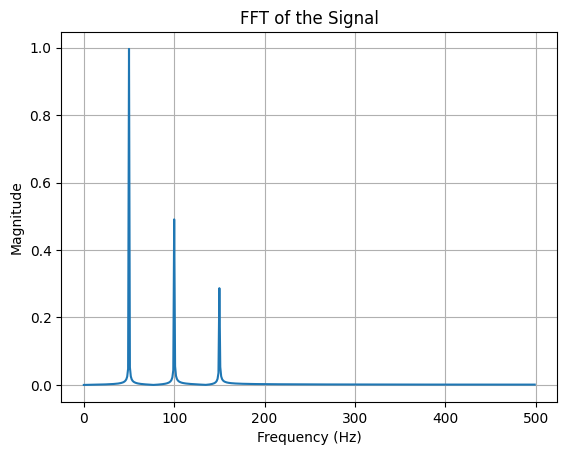

In [115]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq

# Sample signal: fundamental + 2nd and 3rd harmonics
fs = 1000  # Sampling frequency (Hz)
T = 1/fs   # Sampling period
t = np.linspace(0.0, 1.0, fs)  # Time vector (1 second)
fundamental_freq = 50  # Fundamental frequency (Hz)

# Example signal: fundamental + 2nd and 3rd harmonics
signal = np.sin(2 * np.pi * fundamental_freq * t) + 0.5 * np.sin(2 * np.pi * 2 * fundamental_freq * t) + 0.3 * np.sin(2 * np.pi * 3 * fundamental_freq * t)

# Perform FFT
N = len(t)
yf = fft(signal)
xf = fftfreq(N, T)[:N//2]

# Get the magnitudes of the FFT
magnitude = 2.0 / N * np.abs(yf[:N//2])

# Identify the fundamental frequency and harmonics
fundamental_magnitude = magnitude[np.argmin(np.abs(xf - fundamental_freq))]
second_harmonic_magnitude = magnitude[np.argmin(np.abs(xf - 2 * fundamental_freq))]
third_harmonic_magnitude = magnitude[np.argmin(np.abs(xf - 3 * fundamental_freq))]

# Calculate THD
harmonic_magnitude_sum = np.sqrt(second_harmonic_magnitude**2 + third_harmonic_magnitude**2)
thd = harmonic_magnitude_sum / fundamental_magnitude

# Calculate THD in dB
thd_dB = 20 * np.log10(thd)

# Print results
print(f"Fundamental Magnitude: {fundamental_magnitude}")
print(f"Second Harmonic Magnitude: {second_harmonic_magnitude}")
print(f"Third Harmonic Magnitude: {third_harmonic_magnitude}")
print(f"Total Harmonic Distortion (THD): {thd:.4f}")
print(f"THD in dB: {thd_dB:.4f} dB")

# Plot the frequency spectrum
plt.plot(xf, magnitude)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('FFT of the Signal')
plt.grid(True)
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def load_spectral_data(file_path):
    """
    Loads spectral data from a CSV file with the given structure.
    """
    df = pd.read_csv(file_path, comment='#')  # Ignore comment lines
    return df

def convert_dBV_to_linear(dBV):
    """
    Converts dBV to linear scale (voltage).
    """
    return 10 ** (dBV / 20)

def compute_average_noise_floor(df, freq_min=0, freq_max=20000):
    """
    Computes the average noise floor (in linear scale) from spectral data.
    You can specify a frequency range to calculate the noise floor within that range.
    """
    # Convert Trace 1 from dBV to linear
    linear_voltage = convert_dBV_to_linear(df['Trace 1 (dBV)'].values)
    
    # Filter the frequency range based on the specified minimum and maximum frequencies
    freqs = df['Frequency (Hz)'].values
    mask = (freqs >= freq_min) & (freqs <= freq_max)
    
    # Extract the relevant portion of the data based on the frequency mask
    selected_freqs = freqs[mask]
    selected_linear_voltage = linear_voltage[mask]
    
    # Compute the average noise floor (RMS of the selected linear voltage)
    avg_noise_floor = np.sqrt(np.mean(selected_linear_voltage**2))
    
    return selected_freqs, selected_linear_voltage, avg_noise_floor

def plot_noise_floor(freqs, linear_voltage, avg_noise_floor):
    """
    Plots the noise floor with the frequency vs. linear voltage.
    """
    plt.figure(figsize=(10, 6))
    plt.plot(freqs, linear_voltage, label="Noise Signal")
    plt.axhline(avg_noise_floor, color='red', linestyle='--', label=f'Avg Noise Floor: {avg_noise_floor:.6f} V')
    plt.title("Noise Floor Across Frequency")
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Amplitude (Linear Voltage)")
    plt.xscale("log")
    plt.yscale("log")
    plt.legend()
    plt.grid(True)
    plt.show()

def main(file_path, freq_min=20, freq_max=20000):
    # Load the spectral data from the file
    df = load_spectral_data(file_path)
    
    # Compute the average noise floor
    selected_freqs, selected_linear_voltage, avg_noise_floor = compute_average_noise_floor(df, freq_min, freq_max)
    
    # Output the result
    print(f"Average Noise Floor (RMS) in range {freq_min} Hz to {freq_max} Hz: {avg_noise_floor:.6f} V")
    
    # Plot the noise floor
    plot_noise_floor(selected_freqs, selected_linear_voltage, avg_noise_floor)

# Replace 'your_spectral_data.csv' with the actual path to your spectral data file

# Example file path and frequency range for noise floor computation
main(file_path, freq_min=20, freq_max=20000)  # Define the frequency range for noise floor


In [ ]:
# Define path prefixes
path_prefixes = [ 
    "../synth-diodes-1f-1r-in-T10-L10-D10/",
]

# Define file suffixes
path_suffixes = [
    # "/scope.csv",
    "/spectrum.csv"
]

# List of parameterized CSV file paths
parameters = [
    "1kHz200mV",
    "1kHz1V",
    "1kHz2V",
    "1kHz5V",
]

csv_files = [(path_prefixes[0], param, path_suffixes[0]) for param in parameters]

# Function to plot a single Oscilloscope Waveform
def plot_waveform(df, name):
    plt.figure(figsize=(10, 5))
    plt.plot(df["Time (s)"], df["Channel 1 (V)"], label=name, color='b')
    plt.xlabel("Time (s)")
    plt.ylabel("Voltage (V)")
    plt.title("Scope " + name)
    plt.grid()
    plt.legend()
    plt.show()

# Function to compute and plot Welch's Power Spectral Density for one signal
def plot_welch_psd(df, name, fs=150000):
    signal_data = df["Channel 1 (V)"].to_numpy()
    f_w, P_w = signal.welch(signal_data, fs=fs, scaling='density', window='hann')
    
    plt.figure(figsize=(10, 5))
    plt.semilogy(f_w, P_w, label=f"Welch's PSD: {name}")
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Power Spectral Density (V²/Hz)")
    plt.title(f"Welch's Method - Power Spectral Density: {name}")
    plt.grid()
    plt.legend()
    plt.show()

# Function to process and plot only one file
def plot_single(file):  
    path_prefix, param, path_suffix = file
    file_path = path_prefix + param + path_suffix
    df = pd.read_csv(file_path, comment='#')
    df_filtered = df[(df["Time (s)"] >= 0)]

    
    plt.figure(figsize=(10, 5))
    plt.plot(
        df_filtered["Time (s)"],
        df_filtered["Channel 1 (V)"], 
        label="±" + param, 
        color='b'
    )
    plt.xlabel("Time (s)")
    plt.ylabel("Voltage (V)")
    plt.title("Single Signal: " + param)
    plt.grid()
    plt.legend()
    plt.show()
    
    # plot_waveform(df, param)
    plot_welch_psd(df, param, fs=3.33333e+06)
    
# Function to execute the plot workflow for one signal
def plot():
    label = "single-waveform-" + csv_files[0][1]
    plt.figure(figsize=(10, 5))
    print(csv_files[0])
    plot_single(csv_files[0])
    
    plt.show()



# 0.002654688225697571,-0.002190055760044513
# 0.00265498822569757,-0.002746504376319426
# .00265495−.00265465
# T = 3e-7
# 1/(.00265495−.00265465)
# fs = 3333333.33333
# availble N = 32768
# plot()



# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt

# Load spectral data (replace 'file_path' with your actual file path)
def load_spectral_data(file_path):
    df = pd.read_csv(file_path, header=None, names=["Frequency", "PSD"])
    return df

# Compute average noise floor in the range 20Hz to 20kHz
def compute_average_noise_floor(df, min_freq=20, max_freq=20000):
    # Select frequencies in the desired range
    df_filtered = df[(df['Frequency'] >= min_freq) & (df['Frequency'] <= max_freq)]
    
    # Calculate the average PSD (this is the noise floor)
    avg_noise_floor = np.mean(df_filtered['PSD'])
    
    return avg_noise_floor

# Plot the PSD in the specified frequency range
def plot_psd(df, min_freq=20, max_freq=20000):
    df_filtered = df[(df['Frequency'] >= min_freq) & (df['Frequency'] <= max_freq)]
    
    plt.figure(figsize=(10, 6))
    plt.plot(df_filtered['Frequency'], df_filtered['PSD'])
    plt.title("Power Spectral Density (PSD) from 20Hz to 20kHz")
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Power/Frequency (dB/Hz)")
    plt.grid(True)
    plt.show()

# Example usage
def main(file_path):
    # Load the spectral data
    df = load_spectral_data(file_path)
    
    # Compute the average noise floor
    avg_noise_floor = compute_average_noise_floor(df)
    print(f"Average Noise Floor (20Hz - 20kHz): {avg_noise_floor:.6f} dB/Hz")
    
    # Plot the PSD
    plot_psd(df)

# Replace 'your_spectral_data.csv' with the path to your spectral analysis file

# main("your_spectral_data.csv")

path_prefix, param, path_suffix = csv_files[0]
file = path_prefix + param + path_suffix 

# main(file)


../synth-diodes-1f-1r-in-T10-L10-D10/1kHz200mV/spectrum.csv


ParserError: Error tokenizing data. C error: Expected 2 fields in line 40, saw 3


('../synth-diodes-1f-1r-in-T10-L10-D10/', '1kHz200mV', '/scope.csv')


<Figure size 1000x500 with 0 Axes>

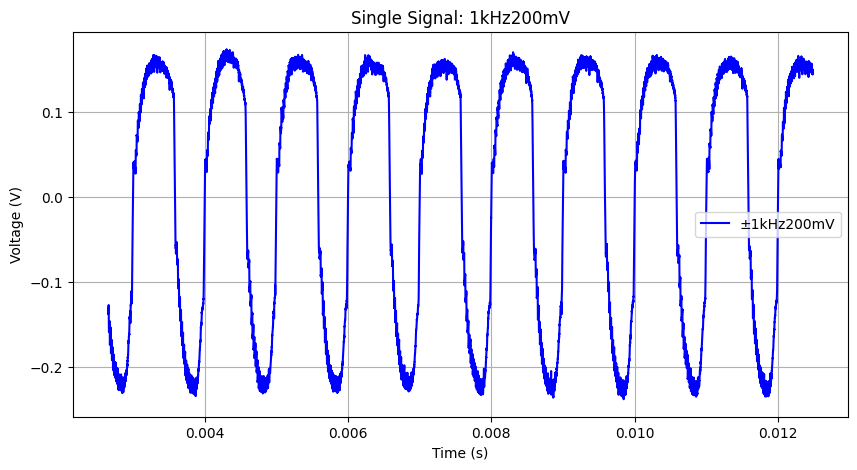

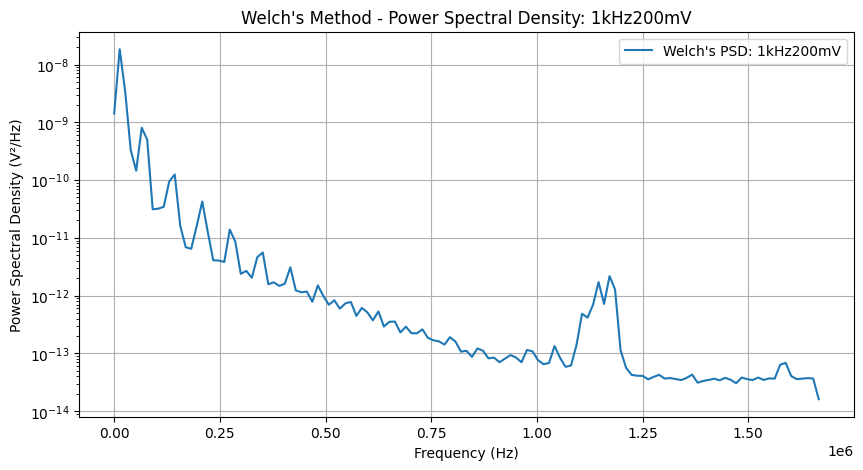

In [ ]:
# Define path prefixes
path_prefixes = [ 
    "../synth-diodes-1f-1r-in-T10-L10-D10/",
]

# Define file suffixes
path_suffixes = [
    "/scope.csv",
    "/spectrum.csv"
]

# List of parameterized CSV file paths
parameters = [
    "1kHz200mV",
    "1kHz1V",
    "1kHz2V",
    "1kHz5V",
]

csv_files = [(path_prefixes[0], param, path_suffixes[0]) for param in parameters]

# Function to plot a single Oscilloscope Waveform
def plot_waveform(df, name):
    plt.figure(figsize=(10, 5))
    plt.plot(df["Time (s)"], df["Channel 1 (V)"], label=name, color='b')
    plt.xlabel("Time (s)")
    plt.ylabel("Voltage (V)")
    plt.title("Scope " + name)
    plt.grid()
    plt.legend()
    plt.show()

# Function to compute and plot Welch's Power Spectral Density for one signal
def plot_welch_psd(df, name, fs=150000):
    signal_data = df["Channel 1 (V)"].to_numpy()
    f_w, P_w = signal.welch(signal_data, fs=fs, scaling='density', window='hann')
    
    plt.figure(figsize=(10, 5))
    plt.semilogy(f_w, P_w, label=f"Welch's PSD: {name}")
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Power Spectral Density (V²/Hz)")
    plt.title(f"Welch's Method - Power Spectral Density: {name}")
    plt.grid()
    plt.legend()
    plt.show()

# Function to process and plot only one file
def plot_single(file):  
    path_prefix, param, path_suffix = file
    file_path = path_prefix + param + path_suffix
    df = pd.read_csv(file_path, comment='#')
    df_filtered = df[(df["Time (s)"] >= 0)]

    
    plt.figure(figsize=(10, 5))
    plt.plot(
        df_filtered["Time (s)"],
        df_filtered["Channel 1 (V)"], 
        label="±" + param, 
        color='b'
    )
    plt.xlabel("Time (s)")
    plt.ylabel("Voltage (V)")
    plt.title("Single Signal: " + param)
    plt.grid()
    plt.legend()
    plt.show()
    
    # plot_waveform(df, param)
    plot_welch_psd(df, param, fs=3.33333e+06)
    
# Function to execute the plot workflow for one signal
def plot():
    label = "single-waveform-" + csv_files[0][1]
    plt.figure(figsize=(10, 5))
    print(csv_files[0])
    plot_single(csv_files[0])
    
    plt.show()



# 0.002654688225697571,-0.002190055760044513
# 0.00265498822569757,-0.002746504376319426
# .00265495−.00265465
# T = 3e-7
# 1/(.00265495−.00265465)
# fs = 3333333.33333
plot()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal as signal

# Define path prefixes
path_prefixes = [ 
    "../real-diodes-out/",
    "../real-diodes-in-T00-L10-D00/",
    "../real-diodes-in-T00-L10-D10/",
    "../real-diodes-in-T10-L10-D00/",
    "../real-diodes-in-T10-L10-D10/",
    "../synth-diodes-1f-1r-in-T00-L10-D00/",
    "../synth-diodes-1f-1r-in-T00-L10-D10/",
    "../synth-diodes-1f-1r-in-T10-L10-D00/",
    "../synth-diodes-1f-1r-in-T10-L10-D10/",
    "../synth-diodes-1f-1r-out/",
    "../synth-diodes-2f-1r-in-T10-L10-D10/",
    "../synth-diodes-2f-1r-out-T10-L10-D10/",
    "../synth-diodes-4f-1r-in-T10-L10-D10/",
    "../synth-diodes-4f-1r-out-T10-L10-D10/"
]

# Define file names
csv_files = [
    "real-diodes.csv",
    "synth-offset-190mV-correction.csv",
    "synth-offset-error.csv"
]

# Function to plot Oscilloscope and Wavegen Data
def plot_waveform(df, file_name):
    plt.figure(figsize=(10, 5))
    plt.plot(df["Time (s)"], df["Channel 1 (V)"], label="Channel 1", color='b')
    plt.plot(df["Time (s)"], df["Wavegen 1 (V)"], label="Wavegen 1", color='r', linestyle='dashed')
    plt.xlabel("Time (s)")
    plt.ylabel("Voltage (V)")
    plt.title(f"Oscilloscope Acquisition & Wavegen Output: {file_name}")
    plt.legend()
    plt.grid()
    plt.show()

# Function to compute and plot Welch's Power Spectral Density
def plot_welch_psd(df, file_name, fs=1600):
    signal_data = df["Channel 1 (V)"].to_numpy()
    f_w, P_w = signal.welch(signal_data, fs=fs, scaling='density', window='hann')
    
    plt.figure(figsize=(10, 5))
    plt.semilogy(f_w, P_w, label=f"Welch's PSD: {file_name}")
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Power Spectral Density (V²/Hz)")
    plt.title(f"Welch's Method - Power Spectral Density: {file_name}")
    plt.grid()
    plt.legend()
    plt.show()

# Process and plot each file from each path
for path_prefix in path_prefixes:
    for file in csv_files:
        csv_path = path_prefix + file
        df = pd.read_csv(csv_path, comment='#')
        plot_waveform(df, file)
        plot_welch_psd(df, file)


FileNotFoundError: [Errno 2] No such file or directory: '../real-diodes-out/real-diodes.csv'

In [293]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sys

# Define path prefix and suffix
path_prefix = "../synth-diodes-out/"
path_suffix = "/scope.csv"

# List of parameterized CSV file paths
parameters = [
    # "100Hz200mV",
    # "100Hz1V",
    # # "100Hz2V",
    # "100Hz5V",
    "1kHz200mV",
    "1kHz1V",
    "1kHz2V",
    "1kHz5V",
]

csv_files = [path_prefix + param + path_suffix for param in parameters]

# Plot Oscilloscope Waveform
def plot_waveform(plt, df, name):
    plt.figure(figsize=(10, 5))
    plt.plot(df["Time (s)"], df["Channel 1 (V)"], label=name, color='b')
    plt.xlabel("Time (s)")
    plt.ylabel("Voltage (V)")
    plt.title("Scope " + name)
    plt.grid()
    plt.legend()
    plt.show()


def plotAll( plt, files ):# Process and plot each file  
    colors = sns.color_palette("husl", len(files))  # Generates distinct colors
    for i, file in enumerate(files):  # Get index (i) and file
        df = pd.read_csv(file, comment='#')
        df_filtered = df[(df["Time (s)"] >= 0) & (df["Time (s)"] <= 0.003)]
        # plt.plot(df["Time (s)"], 
        #          df["Channel 1 (V)"],  
        #          label=file.split("/")[2], 
        #          color=colors[i] # Use index 'i' to vary color
        #         )
        plt.plot(
            df_filtered["Time (s)"],
            df_filtered["Channel 1 (V)"], 
            label=file.split("/")[2][4:], 
            color=colors[i] # Use index 'i' to vary color
        )

def plot():
    plt.figure(figsize=(10, 5))
    plotAll(plt, csv_files)
    plt.xlabel("Time (s)")
    plt.ylabel("Voltage (V)")
    plt.title("Clipped Waveform – 1kHz")
    plt.grid()
    plt.legend(loc="lower right") 
    plt.savefig("Clipped-Waveform-1kHz.png")
    plt.show()

plot()


FileNotFoundError: [Errno 2] No such file or directory: '../synth-diodes-out/1kHz200mV/scope.csv'

<Figure size 1000x500 with 0 Axes>

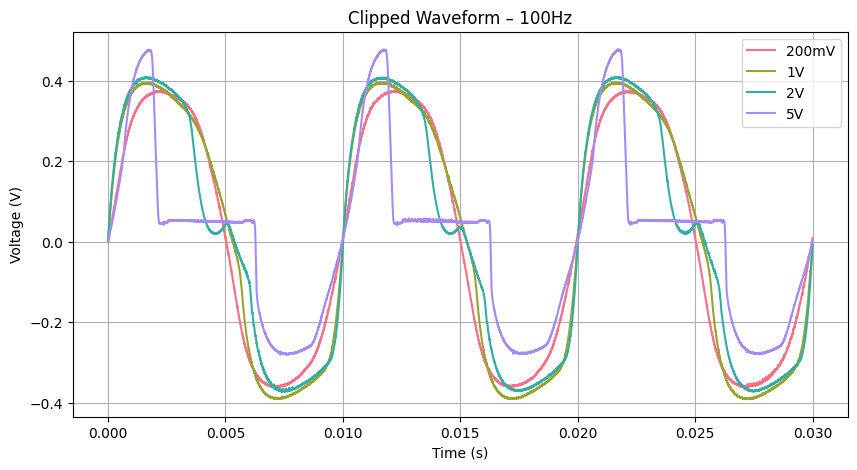

In [296]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sys

# Define path prefix and suffix
path_prefix = "../synth-diodes-1f-1r-in-T00-L10-D00/"
path_suffix = "/scope.csv"

# List of parameterized CSV file paths
parameters = [
    "100Hz200mV",
    "100Hz1V",
    "100Hz2V",
    "100Hz5V",
    # "1kHz200mV",
    # "1kHz1V",
    # "1kHz2V",
    # "1kHz5V",
]

csv_files = [path_prefix + param + path_suffix for param in parameters]

# Plot Oscilloscope Waveform
def plot_waveform(plt, df, name):

    plt.figure(figsize=(10, 5))
    plt.plot(df["Time (s)"], df["Channel 1 (V)"], label=name, color='b')
    plt.xlabel("Time (s)")
    plt.ylabel("Voltage (V)")
    plt.title("Scope " + name)
    plt.grid()
    plt.legend()
    plt.show()


def plotAll( plt, files ):# Process and plot each file  
    
    colors = sns.color_palette("husl", len(files))  # Generates distinct colors
    for i, file in enumerate(files):  # Get index (i) and file
        df = pd.read_csv(file, comment='#')
        df_filtered = df[(df["Time (s)"] >= 0) & (df["Time (s)"] <= 0.03)]
        # plt.plot(
        #     df["Time (s)"], 
        #     df["Channel 1 (V)"],  
        #     label=file.split("/")[2], 
        #     color=colors[i] # Use index 'i' to vary color
        # )
        plt.plot(
            df_filtered["Time (s)"],
            df_filtered["Channel 1 (V)"], 
            label=file.split("/")[2][5:], 
            color=colors[i] # Use index 'i' to vary color
        )
        # print(df_filtered)
    

def plot():
    plt.figure(figsize=(10, 5))
    plotAll(plt, csv_files)
    plt.xlabel("Time (s)")
    plt.ylabel("Voltage (V)")
    plt.title("Clipped Waveform – 100Hz")
    plt.grid()
    plt.legend()
    plt.savefig("Clipped-Waveform-100Hz.png")
    plt.show()

plot()


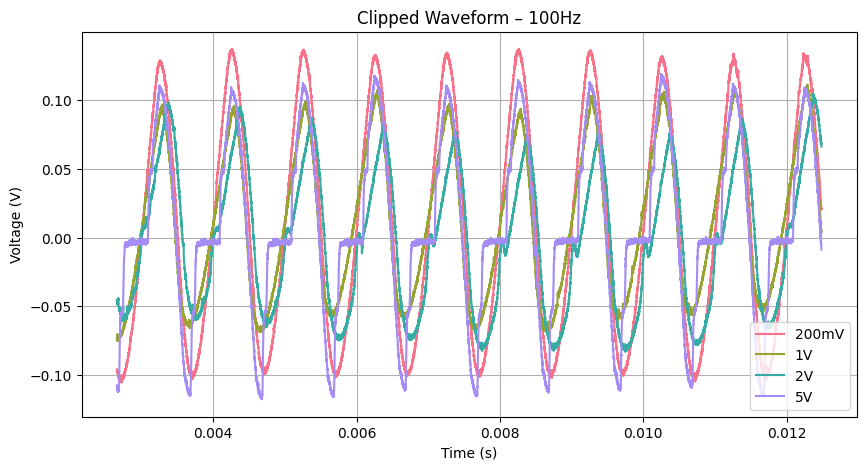

In [310]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sys

# Define path prefix and suffix
path_prefix = "../synth-diodes-1f-1r-in-T00-L10-D00/"
path_suffix = "/scope.csv"

# List of parameterized CSV file paths
parameters = [
    # "100Hz200mV",
    # "100Hz1V",
    # "100Hz2V",
    # "100Hz5V",
    "1kHz200mV",
    "1kHz1V",
    "1kHz2V",
    "1kHz5V",
]

csv_files = [path_prefix + param + path_suffix for param in parameters]

# Plot Oscilloscope Waveform
def plot_waveform(plt, df, name):

    plt.figure(figsize=(10, 5))
    plt.plot(df["Time (s)"], df["Channel 1 (V)"], label=name, color='b')
    plt.xlabel("Time (s)")
    plt.ylabel("Voltage (V)")
    plt.title("Scope " + name)
    plt.grid()
    plt.legend()
    plt.show()


def plotAll( plt, files ):# Process and plot each file  
    
    colors = sns.color_palette("husl", len(files))  # Generates distinct colors
    for i, file in enumerate(files):  # Get index (i) and file
        df = pd.read_csv(file, comment='#')
        df_filtered = df[(df["Time (s)"] >= 0) & (df["Time (s)"] <= 0.03)]
        # plt.plot(
        #     df["Time (s)"], 
        #     df["Channel 1 (V)"],  
        #     label=file.split("/")[2], 
        #     color=colors[i] # Use index 'i' to vary color
        # )
        plt.plot(
            df_filtered["Time (s)"],
            df_filtered["Channel 1 (V)"], 
            label=file.split("/")[2][4:], 
            color=colors[i] # Use index 'i' to vary color
        )
        # print(df_filtered)
    

def plot():
    plt.figure(figsize=(10, 5))
    plotAll(plt, csv_files)
    plt.xlabel("Time (s)")
    plt.ylabel("Voltage (V)")
    plt.title("Clipped Waveform – 100Hz")
    plt.grid()
    plt.legend()
    plt.savefig("Clipped-Waveform-100Hz.png")
    plt.show()

plot()


/var/folders/10/yxvsq_bs3l970t62mzzkgk0c0000gp/T/ipykernel_40854/667153747.py:51: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


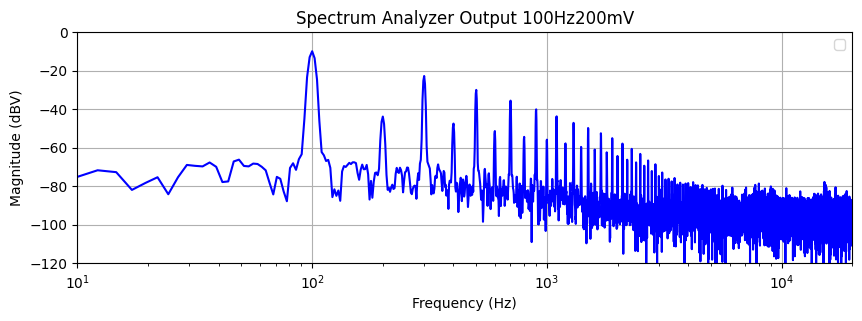

/var/folders/10/yxvsq_bs3l970t62mzzkgk0c0000gp/T/ipykernel_40854/667153747.py:51: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


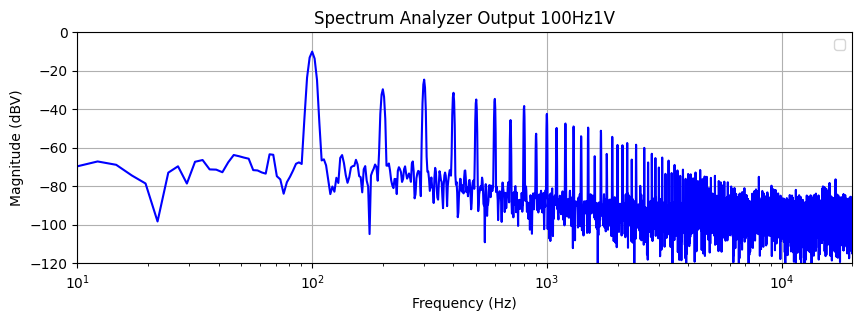

/var/folders/10/yxvsq_bs3l970t62mzzkgk0c0000gp/T/ipykernel_40854/667153747.py:51: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


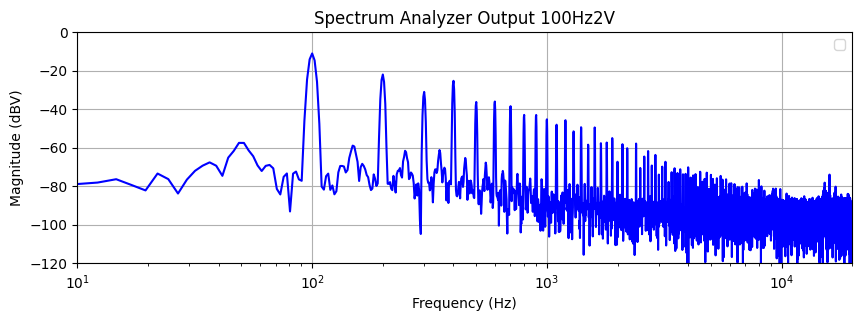

/var/folders/10/yxvsq_bs3l970t62mzzkgk0c0000gp/T/ipykernel_40854/667153747.py:51: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


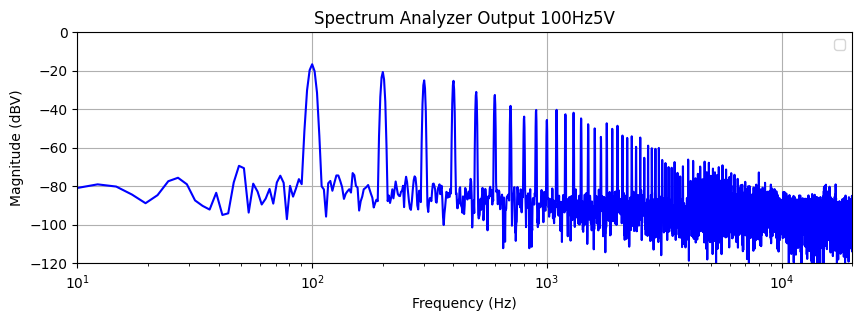

/var/folders/10/yxvsq_bs3l970t62mzzkgk0c0000gp/T/ipykernel_40854/667153747.py:51: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


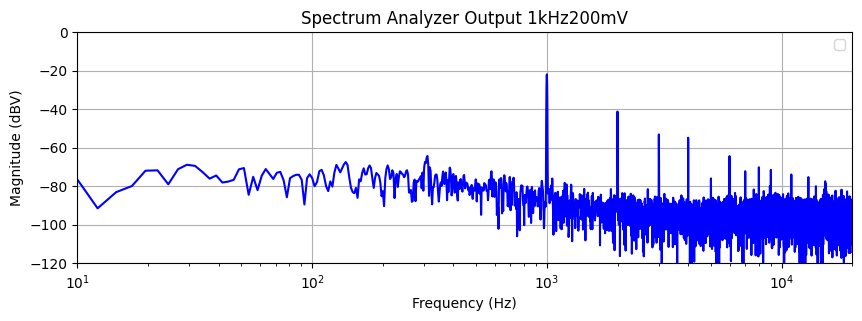

/var/folders/10/yxvsq_bs3l970t62mzzkgk0c0000gp/T/ipykernel_40854/667153747.py:51: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


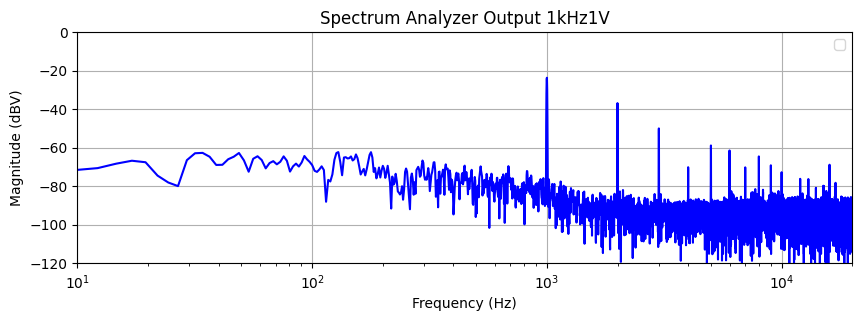

/var/folders/10/yxvsq_bs3l970t62mzzkgk0c0000gp/T/ipykernel_40854/667153747.py:51: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


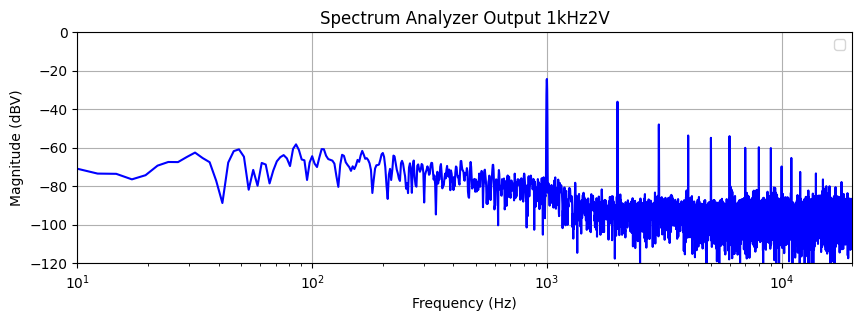

/var/folders/10/yxvsq_bs3l970t62mzzkgk0c0000gp/T/ipykernel_40854/667153747.py:51: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


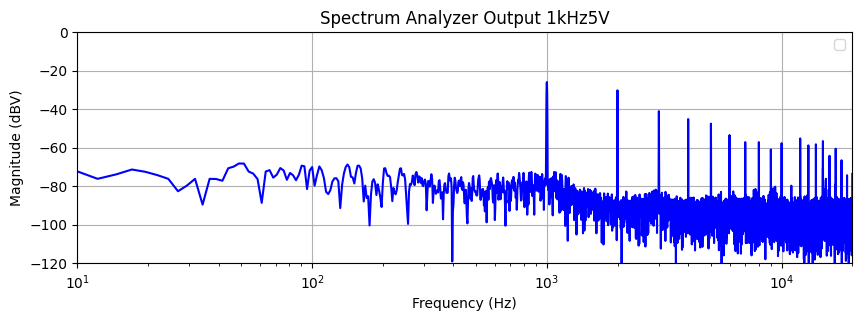

In [309]:
import pandas as pd
import matplotlib.pyplot as plt
import sys
import seaborn as sns


# Define path prefix and suffix
# path_prefix = "../SynthDiodesOutOfCircuit/-bkp-20250403/"
path_prefix = "../synth-diodes-1f-1r-in-T00-L10-D10/"
path_suffix = "/spectrum.csv"

# List of parameterized CSV file paths
parameters = [
    "100Hz200mV",
    "100Hz1V",
    "100Hz2V",
    "100Hz5V",
    "1kHz200mV",
    "1kHz1V",
    "1kHz2V",
    "1kHz5V",
]

csv_files = [path_prefix + param + path_suffix for param in parameters]

# Compute Global Axis Limits
all_data = [pd.read_csv(file, comment='#') for file in csv_files]

# global_xmax = max(df["Frequency (Hz)"].max() for df in all_data)
# global_xmin = min(df["Frequency (Hz)"].min() for df in all_data)
global_xmax = 20000
global_xmin = 10
global_ymax_mag = 0
global_ymin_mag = -120
# global_ymin_mag = min(df["Trace 1 (dBV)"].min() for df in all_data)
global_ymin_phase = min(df["Phase (deg)"].min() for df in all_data)
global_ymax_phase = max(df["Phase (deg)"].max() for df in all_data)

# Plot Magnitude Spectrum
def plot_spectrum(df, file_name):
    plt.figure(figsize=(10, 3))
    plt.plot(df["Frequency (Hz)"], df["Trace 1 (dBV)"], color='b')
    # plt.plot(df["Frequency (Hz)"], df["Trace 1 (dBV)"], label="Magnitude (dBV)", color='b')
    plt.xscale("log")
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Magnitude (dBV)")
    plt.title("Spectrum Analyzer Output " + file_name)
    plt.xlim(global_xmin, global_xmax)  # Apply global x-axis limits
    plt.ylim(global_ymin_mag, global_ymax_mag)  # Apply global y-axis limits for magnitude
    plt.grid()
    plt.legend()
    plt.savefig( "spectrum-" + file_name + ".png")
    plt.show()

# Plot Phase Response
def plot_phase(df, file_name):
    plt.figure(figsize=(10, 5))
    plt.plot(df["Frequency (Hz)"], df["Phase (deg)"], label="Phase (deg)", color='r')
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Phase (degrees)")
    plt.title("Phase Response" + file_name)
    plt.grid()
    plt.legend()
    plt.show()

def plot_all( files ):# Process and plot each file  

    # colors = sns.color_palette("husl", len(files))  # Generates distinct colors
    for i, file in enumerate(files):  # Get index (i) and file
        df = pd.read_csv(file, comment='#')
       
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
        fig.suptitle('Spectrum – Phase plots')
        
        ax1.plot(df["Frequency (Hz)"], 
                 df["Trace 1 (dBV)"], 
                 label=file.split("/")[2], 
                 color='b'
                #  color=colors[i] # Use index 'i' to vary color
                 )
        ax2.plot(df["Frequency (Hz)"], 
                 df["Phase (deg)"], 
                 label=file.split("/")[2], 
                #  color=colors[i] # Use index 'i' to vary color
                 color='b'
                 ) 
        
        ax1.set_xlabel("Frequency (Hz)")
        ax1.set_ylabel("Magnitude (dBV)")
        ax2.set_xlabel("Frequency (Hz)")
        ax2.set_ylabel("Phase (deg)")
        ax1.legend()
        ax2.legend()


# plot_all( csv_files)

def plot_spectra(files):
    for i, file in enumerate(files):  # Get index (i) and file
        df = pd.read_csv(file, comment='#')
        plot_spectrum(df, file.split("/")[2])


plot_spectra(csv_files)

In [307]:
# path_prefix = "../synth-diodes-in-T00-L10-D00/" 100Hz
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sys

# Define path prefix and suffix
# path_prefix = "../synth-diodes-in-T00-L10-D00/"
# path_prefix = "../synth-diodes-in-T00-L10-D10/"
# path_prefix = "../synth-diodes-in-T10-L10-D00/"
path_prefix = "../synth-diodes-in-T10-L10-D10/"
path_suffix = "/scope.csv"

# List of parameterized CSV file paths
parameters = [
    "100Hz200mV",
    "100Hz1V",
    "100Hz2V",
    "100Hz5V",
    # "1kHz200mV",
    # "1kHz1V",
    # "1kHz2V",
    # "1kHz5V",
]

csv_files = [path_prefix + param + path_suffix for param in parameters]

# Plot Oscilloscope Waveform
def plot_waveform(plt, df, name):

    plt.figure(figsize=(10, 5))
    plt.plot(df["Time (s)"], df["Channel 1 (V)"], label=name, color='b')
    plt.xlabel("Time (s)")
    plt.ylabel("Voltage (V)")
    plt.title("Scope " + name)
    plt.grid()
    plt.legend()
    plt.show()


def plotAll( plt, files ):# Process and plot each file  
    
    colors = sns.color_palette("husl", len(files))  # Generates distinct colors
    for i, file in enumerate(files):  # Get index (i) and file
        df = pd.read_csv(file, comment='#')
        df_filtered = df[(df["Time (s)"] >= 0) & (df["Time (s)"] <= 0.03)]
        # plt.plot(
        #     df["Time (s)"], 
        #     df["Channel 1 (V)"],  
        #     label=file.split("/")[2], 
        #     color=colors[i] # Use index 'i' to vary color
        # )
        plt.plot(
            df_filtered["Time (s)"],
            df_filtered["Channel 1 (V)"], 
            label=file.split("/")[2][5:], 
            color=colors[i] # Use index 'i' to vary color
        )
        # print(df_filtered)
    

def plot():
    plt.figure(figsize=(10, 5))
    plotAll(plt, csv_files)
    plt.xlabel("Time (s)")
    plt.ylabel("Voltage (V)")
    plt.title("Clipped Waveform – 100Hz")
    plt.grid()
    plt.legend()
    plt.savefig("Clipped-Waveform-100Hz.png")
    plt.show()

plot()


FileNotFoundError: [Errno 2] No such file or directory: '../synth-diodes-in-T10-L10-D10/100Hz200mV/scope.csv'

<Figure size 1000x500 with 0 Axes>

In [306]:
# path_prefix = "../synth-diodes-in-T00-L10-D00/" 1KHz
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sys

# Define path prefix and suffix
# path_prefix = "../synth-diodes-in-T00-L10-D00/"
# path_prefix = "../synth-diodes-in-T00-L10-D10/"
path_prefix = "../synth-diodes-in-T10-L10-D00/"
# path_prefix = "../synth-diodes-in-T10-L10-D10/"
path_suffix = "/scope.csv"

# List of parameterized CSV file paths
parameters = [
    # "100Hz200mV",
    # "100Hz1V",
    # "100Hz2V",
    # "100Hz5V",
    "1kHz200mV",
    "1kHz1V",
    "1kHz2V",
    "1kHz5V",
]

csv_files = [path_prefix + param + path_suffix for param in parameters]

# Plot Oscilloscope Waveform
def plot_waveform(plt, df, name):

    plt.figure(figsize=(10, 5))
    plt.plot(df["Time (s)"], df["Channel 1 (V)"], label=name, color='b')
    plt.xlabel("Time (s)")
    plt.ylabel("Voltage (V)")
    plt.title("Scope " + name)
    plt.grid()
    plt.legend()
    plt.show()


def plotAll( plt, files ):# Process and plot each file  
    
    colors = sns.color_palette("husl", len(files))  # Generates distinct colors
    for i, file in enumerate(files):  # Get index (i) and file
        df = pd.read_csv(file, comment='#')
        df_filtered = df[(df["Time (s)"] >= 0) & (df["Time (s)"] <= 0.03)]
        # plt.plot(
        #     df["Time (s)"], 
        #     df["Channel 1 (V)"],  
        #     label=file.split("/")[2], 
        #     color=colors[i] # Use index 'i' to vary color
        # )
        plt.plot(
            df_filtered["Time (s)"],
            df_filtered["Channel 1 (V)"], 
            label=file.split("/")[2][4:], 
            color=colors[i] # Use index 'i' to vary color
        )
        # print(df_filtered)
    

def plot():
    plt.figure(figsize=(10, 5))
    plotAll(plt, csv_files)
    plt.xlabel("Time (s)")
    plt.ylabel("Voltage (V)")
    plt.title("Clipped Waveform – 1kHz")
    plt.grid()
    plt.legend()
    plt.savefig("Clipped-Waveform-1kHz.png")
    plt.show()

plot()


FileNotFoundError: [Errno 2] No such file or directory: '../synth-diodes-in-T10-L10-D00/1kHz200mV/scope.csv'

<Figure size 1000x500 with 0 Axes>

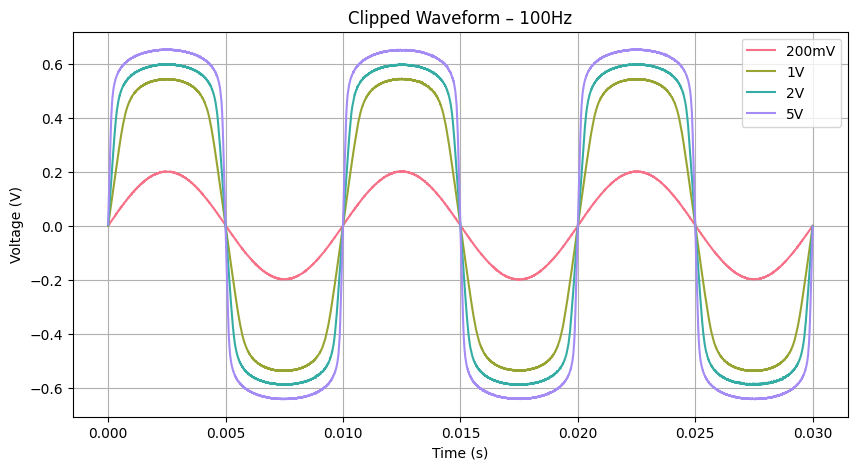

In [297]:
# path_prefix = "../real-diodes-out/"
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sys

# Define path prefix and suffix
path_prefix = "../real-diodes-out/"
path_suffix = "/scope.csv"

# List of parameterized CSV file paths
parameters = [
    "100Hz200mV",
    "100Hz1V",
    "100Hz2V",
    "100Hz5V",
    # "1kHz200mV",
    # "1kHz1V",
    # "1kHz2V",
    # "1kHz5V",
]

csv_files = [path_prefix + param + path_suffix for param in parameters]

# Plot Oscilloscope Waveform
def plot_waveform(plt, df, name):

    plt.figure(figsize=(10, 5))
    plt.plot(df["Time (s)"], df["Channel 1 (V)"], label=name, color='b')
    plt.xlabel("Time (s)")
    plt.ylabel("Voltage (V)")
    plt.title("Scope " + name)
    plt.grid()
    plt.legend()
    plt.show()


def plotAll( plt, files ):# Process and plot each file  
    
    colors = sns.color_palette("husl", len(files))  # Generates distinct colors
    for i, file in enumerate(files):  # Get index (i) and file
        df = pd.read_csv(file, comment='#')
        df_filtered = df[(df["Time (s)"] >= 0) & (df["Time (s)"] <= 0.03)]
        # plt.plot(
        #     df["Time (s)"], 
        #     df["Channel 1 (V)"],  
        #     label=file.split("/")[2], 
        #     color=colors[i] # Use index 'i' to vary color
        # )
        plt.plot(
            df_filtered["Time (s)"],
            df_filtered["Channel 1 (V)"], 
            label=file.split("/")[2][5:], 
            color=colors[i] # Use index 'i' to vary color
        )
        # print(df_filtered)
    

def plot():
    plt.figure(figsize=(10, 5))
    plotAll(plt, csv_files)
    plt.xlabel("Time (s)")
    plt.ylabel("Voltage (V)")
    plt.title("Clipped Waveform – 100Hz")
    plt.grid()
    plt.legend()
    plt.savefig("Clipped-Waveform-100Hz.png")
    plt.show()

plot()


/var/folders/10/yxvsq_bs3l970t62mzzkgk0c0000gp/T/ipykernel_40854/2940423996.py:53: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


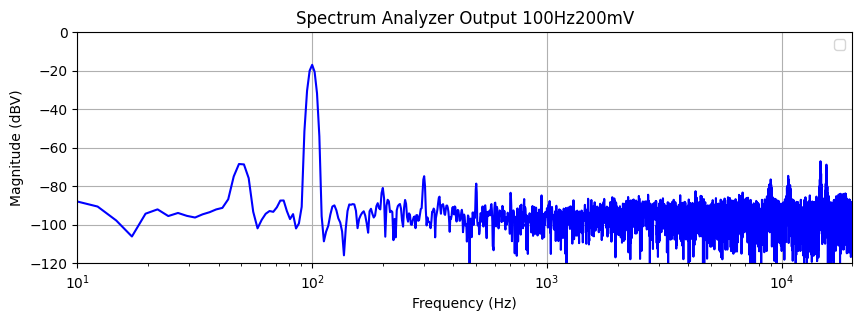

/var/folders/10/yxvsq_bs3l970t62mzzkgk0c0000gp/T/ipykernel_40854/2940423996.py:53: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


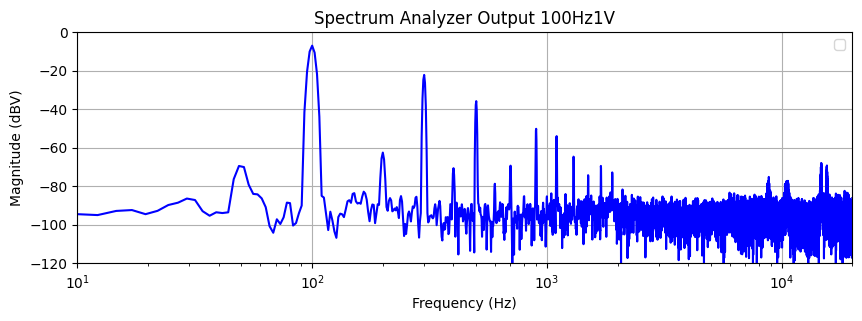

/var/folders/10/yxvsq_bs3l970t62mzzkgk0c0000gp/T/ipykernel_40854/2940423996.py:53: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


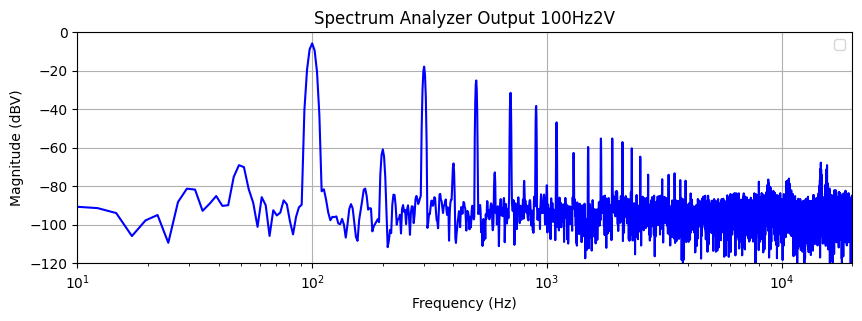

/var/folders/10/yxvsq_bs3l970t62mzzkgk0c0000gp/T/ipykernel_40854/2940423996.py:53: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


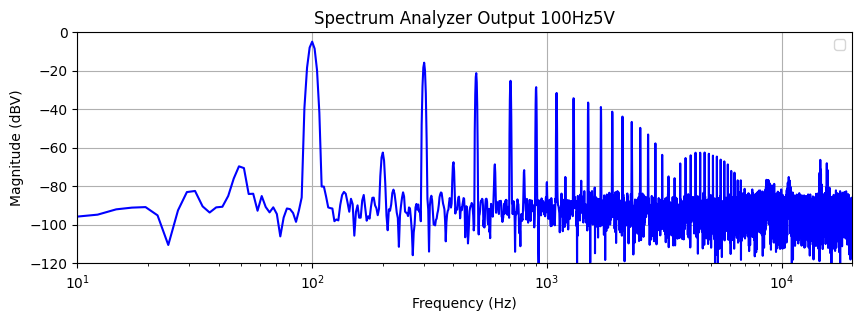

/var/folders/10/yxvsq_bs3l970t62mzzkgk0c0000gp/T/ipykernel_40854/2940423996.py:53: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


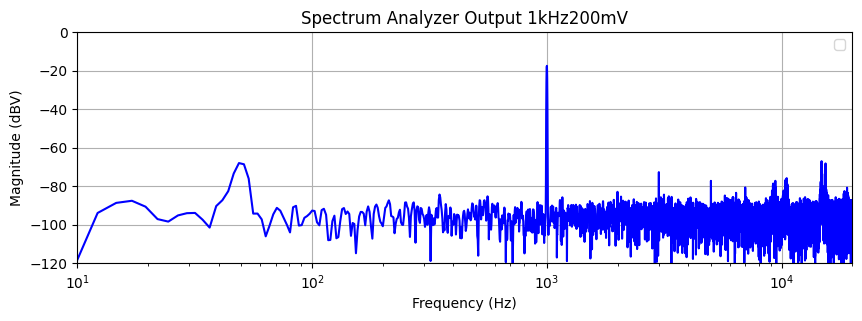

/var/folders/10/yxvsq_bs3l970t62mzzkgk0c0000gp/T/ipykernel_40854/2940423996.py:53: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


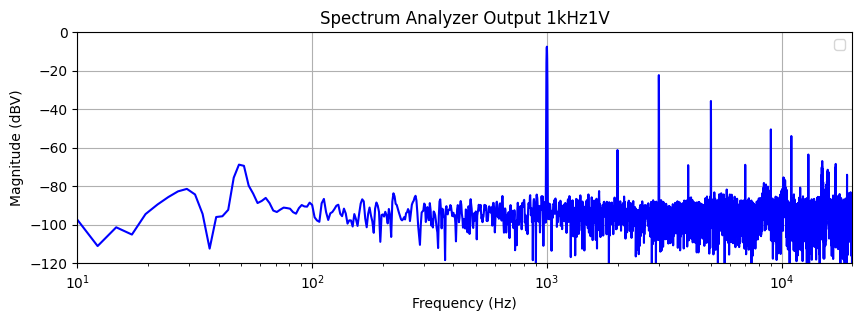

/var/folders/10/yxvsq_bs3l970t62mzzkgk0c0000gp/T/ipykernel_40854/2940423996.py:53: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


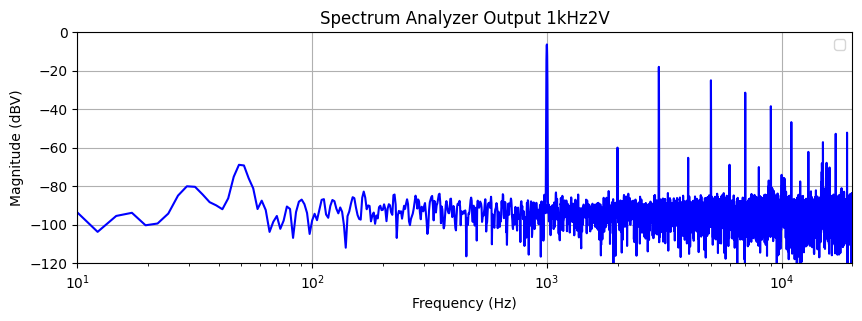

/var/folders/10/yxvsq_bs3l970t62mzzkgk0c0000gp/T/ipykernel_40854/2940423996.py:53: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


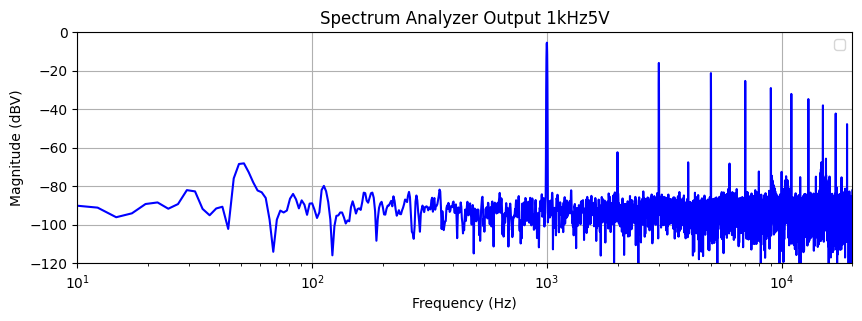

In [304]:
# path_prefix = "../real-diodes-out/"
import pandas as pd
import matplotlib.pyplot as plt
import sys
import seaborn as sns
import scipy.signal as signal
import sys

# Define path prefix and suffix
path_prefix = "../real-diodes-out/"
path_suffix = "/spectrum.csv"
# path_suffix = "/spectrum.csv"

# List of parameterized CSV file paths
parameters = [
    "100Hz200mV",
    "100Hz1V",
    "100Hz2V",
    "100Hz5V",
    "1kHz200mV",
    "1kHz1V",
    "1kHz2V",
    "1kHz5V",
]

csv_files = [path_prefix + param + path_suffix for param in parameters]

# Compute Global Axis Limits
all_data = [pd.read_csv(file, comment='#') for file in csv_files]

# global_xmax = max(df["Frequency (Hz)"].max() for df in all_data)
# global_xmin = min(df["Frequency (Hz)"].min() for df in all_data)
global_xmax = 20000
global_xmin = 10
global_ymax_mag = 0
global_ymin_mag = -120
# global_ymin_mag = min(df["Trace 1 (dBV)"].min() for df in all_data)
global_ymin_phase = min(df["Phase (deg)"].min() for df in all_data)
global_ymax_phase = max(df["Phase (deg)"].max() for df in all_data)

# Plot Magnitude Spectrum
def plot_spectrum(df, file_name):
    plt.figure(figsize=(10, 3))
    plt.plot(df["Frequency (Hz)"], df["Trace 1 (dBV)"], color='b')
    # plt.plot(df["Frequency (Hz)"], df["Trace 1 (dBV)"], label="Magnitude (dBV)", color='b')
    plt.xscale("log")
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Magnitude (dBV)")
    plt.title("Spectrum Analyzer Output " + file_name)
    plt.xlim(global_xmin, global_xmax)  # Apply global x-axis limits
    plt.ylim(global_ymin_mag, global_ymax_mag)  # Apply global y-axis limits for magnitude
    plt.grid()
    plt.legend()
    plt.savefig( "spectrum-" + file_name + ".png")
    plt.show()

# Plot Phase Response
def plot_phase(df, file_name):
    plt.figure(figsize=(10, 5))
    plt.plot(df["Frequency (Hz)"], df["Phase (deg)"], label="Phase (deg)", color='r')
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Phase (degrees)")
    plt.title("Phase Response" + file_name)
    plt.grid()
    plt.legend()
    plt.show()


def plot_welch_psd(df, name, fs=1600):
    signal_data = df["Channel 1 (V)"].to_numpy()
    f_w, P_w = signal.welch(signal_data, fs=fs, scaling='density', window='hann')
    
    plt.figure(figsize=(10, 5))
    plt.semilogy(f_w, P_w, label=f"Welch's PSD: {name}")
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Power Spectral Density (V²/Hz)")
    plt.title(f"Welch's Method - Power Spectral Density: {name}")
    plt.grid()
    plt.legend()
    plt.show()

def plot_all( files ):# Process and plot each file  

    # colors = sns.color_palette("husl", len(files))  # Generates distinct colors
    for i, file in enumerate(files):  # Get index (i) and file
        df = pd.read_csv(file, comment='#')
       
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
        fig.suptitle('Spectrum – Phase plots')
        
        ax1.plot(df["Frequency (Hz)"], 
                 df["Trace 1 (dBV)"], 
                 label=file.split("/")[2], 
                 color='b'
                #  color=colors[i] # Use index 'i' to vary color
                 )
        ax2.plot(df["Frequency (Hz)"], 
                 df["Phase (deg)"], 
                 label=file.split("/")[2], 
                #  color=colors[i] # Use index 'i' to vary color
                 color='b'
                 ) 
        
        ax1.set_xlabel("Frequency (Hz)")
        ax1.set_ylabel("Magnitude (dBV)")
        ax2.set_xlabel("Frequency (Hz)")
        ax2.set_ylabel("Phase (deg)")
        ax1.legend()
        ax2.legend()


# plot_all( csv_files)

def plot_spectra(files):
    for i, file in enumerate(files):  # Get index (i) and file
        df = pd.read_csv(file, comment='#')
        plot_spectrum(df, file.split("/")[2])
        # plot_welch_psd(df, file.split("/")[2])


plot_spectra(csv_files)

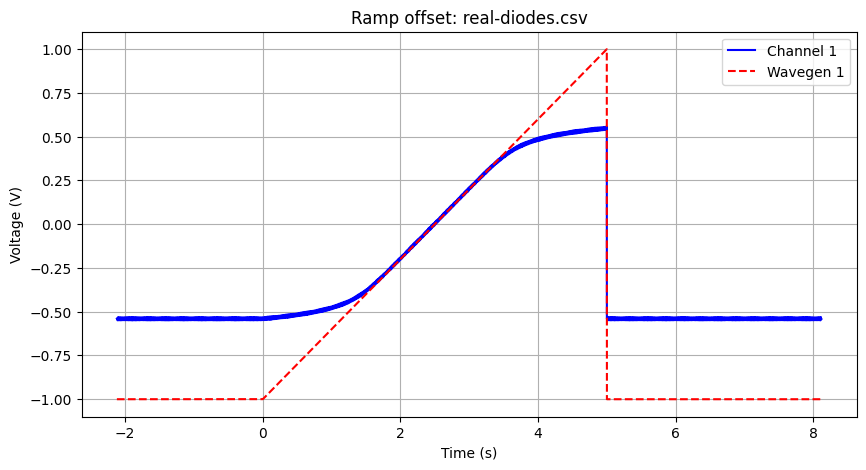

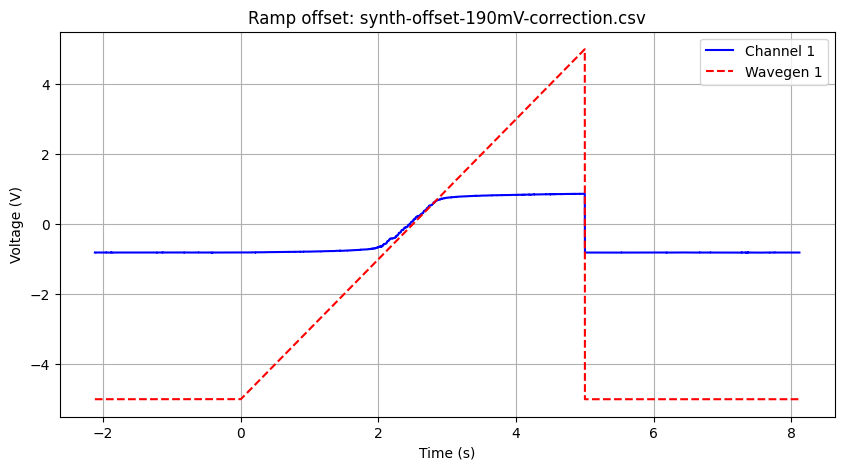

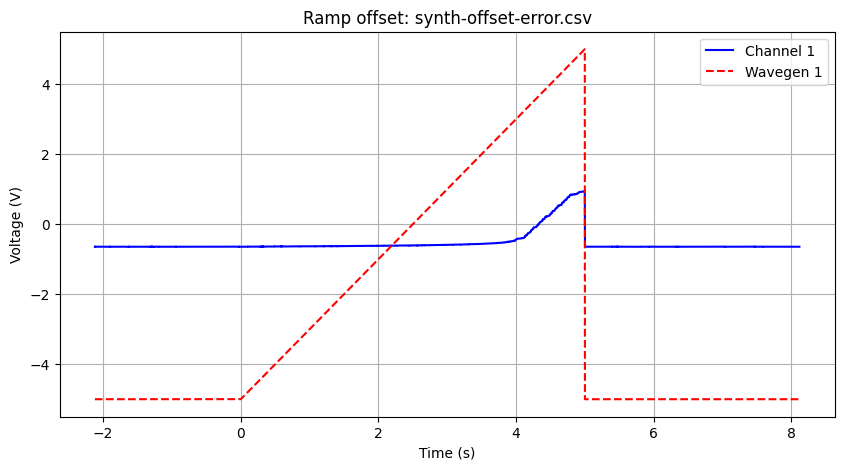

In [305]:
import pandas as pd
import matplotlib.pyplot as plt

# Define path prefix and file names
path_prefix = "../ramp-offset/"
csv_files = [
    "real-diodes.csv",
    "synth-offset-190mV-correction.csv",
    "synth-offset-error.csv"
]

# Function to plot Oscilloscope and Wavegen Data
def plot_waveform(df, file_name):
    plt.figure(figsize=(10, 5))
    plt.plot(df["Time (s)"], df["Channel 1 (V)"], label="Channel 1", color='b')
    plt.plot(df["Time (s)"], df["Wavegen 1 (V)"], label="Wavegen 1", color='r', linestyle='dashed')
    plt.xlabel("Time (s)")
    plt.ylabel("Voltage (V)")
    plt.title(f"Ramp offset: {file_name}")
    plt.legend()
    plt.grid()
    plt.show()

# Process and plot each file
for file in csv_files:
    csv_path = path_prefix + file
    df = pd.read_csv(csv_path, comment='#')
    plot_waveform(df, file)